# Translating droplet case in Zuzio2020

The radius of the droplet is $R=0.15 $ and moves with the velocity $(0 0 10)$, while the ambient flow is  initialized with potential theory. The computational domain has the size of $L_x=L_y=1, L_z=2$. The droplet centre is expected to move from the position $(0.5\ 0.5\ 0.5)$ to $(0.5\ 0.5\ 1.5)$ with time $t_{end}= 0.1$. In paper Zuzio2020, only one resolution is test, which is $N=[32]$. we tested also only the case with $N=[32]$.$CFL$ number plays key role in our method. 4 $CFL$ numbers are tested, namely $[0.005\ 0.01\ 0.05\ 0.1]$. The ambient flow's density is $1$, while the density of droplet is $10^6$.To highlight the contribution of consistent convection to the moment equation, no surface tension force, no viscose effects and no gravity are taken into account.

To evaluate the results of this case quantitatively, Zuzio2020 put forward 2 criteria:  **the high density phase mass and kinetic energy**. 

$$
    sumAlpha = \frac{M(t)}{M(0)}=\frac{\sum_{i,j,k} C_{i,j,k}(t)}{\sum_{i,j,k} C_{i,j,k}(0)}.
$$

$$
    sumKinE=\frac{E_k(t)}{E_k(0)}=\frac{\sum_{i,j,k}(\rho_{i,j,k}(t) \mathbf{v}_{i,j,k}(t))^2}{\sum_{i,j,k}(\rho_{i,j,k}(0) \mathbf{v}_{i,j,k}(0))^2}.
$$

In the first equation, $C_{i,j,k}(t)$ indicates the marker of a cell $\Omega_{i,j,k}$ at time $t$. These two ratios shows the time evolution of normalized global sum of marker and kinetic energy.Their values are expected to near one, because there is no source and dissipation for both marker and kinetic energy in this case. On the other hand, the shape of droplet should keep almost unchanged, since the density ratio is very high and the influence of ambient flow can be neglected (bussmann2002). 

After verifying, we found that there exsits periodic oscillation in the results of $sumKinE$, of which the frequence is propotional to mesh resolution. We modified then the form of $sumKinE$ corresponding to classic defination:

$$
    sumKinE=\frac{E_k(t)}{E_k(0)}=\frac{\sum_{i,j,k}0.5\rho_{i,j,k}(t)(\mathbf{v}_{i,j,k}(t))^2}{\sum_{i,j,k}0.5\rho_{i,j,k}(0)(\mathbf{v}_{i,j,k}(0))^2}.
$$

It should be noted that we use uniform grid,thus, we didn't add cell volume to every term. 

In [24]:
import sys
#print(sys.path)
#sys.path.remove('/work/projects/project01456/lent/cases/scripts/modules')
print(sys.path)
import dataframeWithMetadata as dfmd
import dataAgglomeration as da
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 400
sys.path.append(os.environ['ARGO_PYTHON_MODULES'])
#if (not(os.path.exists('figures'))):
#    os.mkdir('figures')

idx = pd.IndexSlice
    
def plot_NsumAlpha_dframe(dframe,tScheme,divScheme,title):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    dframe=dframe.loc[idx[tScheme,divScheme]]
    # resolutions = dframe.index.get_level_values("resolution").unique()
    CFLs = dframe.index.get_level_values("CFL_num").unique()
    #print(CFLs)
    #CFLs=[0.005, 0.01, 0.05, 0.1]
    #resolution = 32
    #v = 0.01

    for CFL in CFLs:
        df_subset = dframe.loc[CFL]
        sumAlpha = df_subset['sumAlpha']
        sumAlpha0 = sumAlpha[0]
        plt.plot(df_subset["time"], sumAlpha / sumAlpha0, 
                     label="%s; %s; RESOLUTION:32; CFL:%s" % (tScheme,divScheme, CFL))
    plt.title(title)
    plt.ylabel("Normalized Mass")
    plt.xlabel("Time in seconds")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
    
def plot_NsumKinE_dframe(dframe,tScheme,divScheme,title):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    dframe=dframe.loc[idx[tScheme,divScheme]]
    CFLs = dframe.index.get_level_values("CFL_num").unique()
    #CFLs=[0.005, 0.01, 0.05, 0.1]
   # resolutions = [32]
    #v = 0.01

    for CFL in CFLs:
        df_subset = dframe.loc[CFL]
        sumKinE = df_subset['sumKinE']
        sumKinE0 = sumKinE[0]
        plt.plot(df_subset["time"], sumKinE / sumKinE0, 
                     label="%s; %s; RESOLUTION:32; CFL:%s" % (tScheme,divScheme, CFL))
    plt.title(title)
    plt.ylabel("Normalized kinetic energy")
    plt.xlabel("Time in seconds")
    plt.yscale('log')
    plt.ylim(0.99,1.01)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)

['/work/groups/da_mma_b/jun/argo_denstyRatio_test/cases/hydrodynamic/Zuzio2020_translatingDropletInQuiescentFluid3D', '', '/work/projects/project01456/pyfoam/lib64/python3.6/site-packages', '/work/groups/da_mma_b/jun/argo_denstyRatio_test/cases/hydrodynamic/Zuzio2020_translatingDropletInQuiescentFluid3D/PYTHONPATH', '/work/groups/da_mma_b/jun/argo/cases/scripts/modules', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python39.zip', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9/lib-dynload', '/home/jl95muce/.local/lib/python3.9/site-packages', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9/site-packages', '/shared/apps/.gcc/10.2/.openmpi/4.0/python/3.9.5/lib/python3.9/site-packages/IPython/extensions', '/work/home/jl95muce/.ipython', '/work/groups/da_mma_b/jun/argo/cases/scripts/modules', '/work/groups/da_mma_b/jun/argo/cases/scripts/modules']


In [25]:
agglomerator = da.data_agglomerator("Zuzio2020.parameter","stationaryDropletResults.csv", 
                                     "./interIsoFoam-Zuzio2020_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoFoam_Zuzio2020.csv")
dframe = agglomerator.study_dataframe()
dframe = dframe.sort_index()
dframe = dframe.loc[dframe.index.get_level_values('CFL_num') <= 0.1]

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['placeholder.stl'], [0.150001], [0.500007], [0.500007], [0.500007], ['CrankNicolson0.9', 'Euler'], ['limitedLinearV1', 'upwind'], [0.1], [0.005, 0.01, 0.1, 0.5], [32], [0], [0], [10], [0.0], [0.0], [1.0], [0.0], [1000000.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'timeSchemes', 'fluxSchemes', 'end_time', 'CFL_num', 'resolution', 'y_velocity', 'x_velocity', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


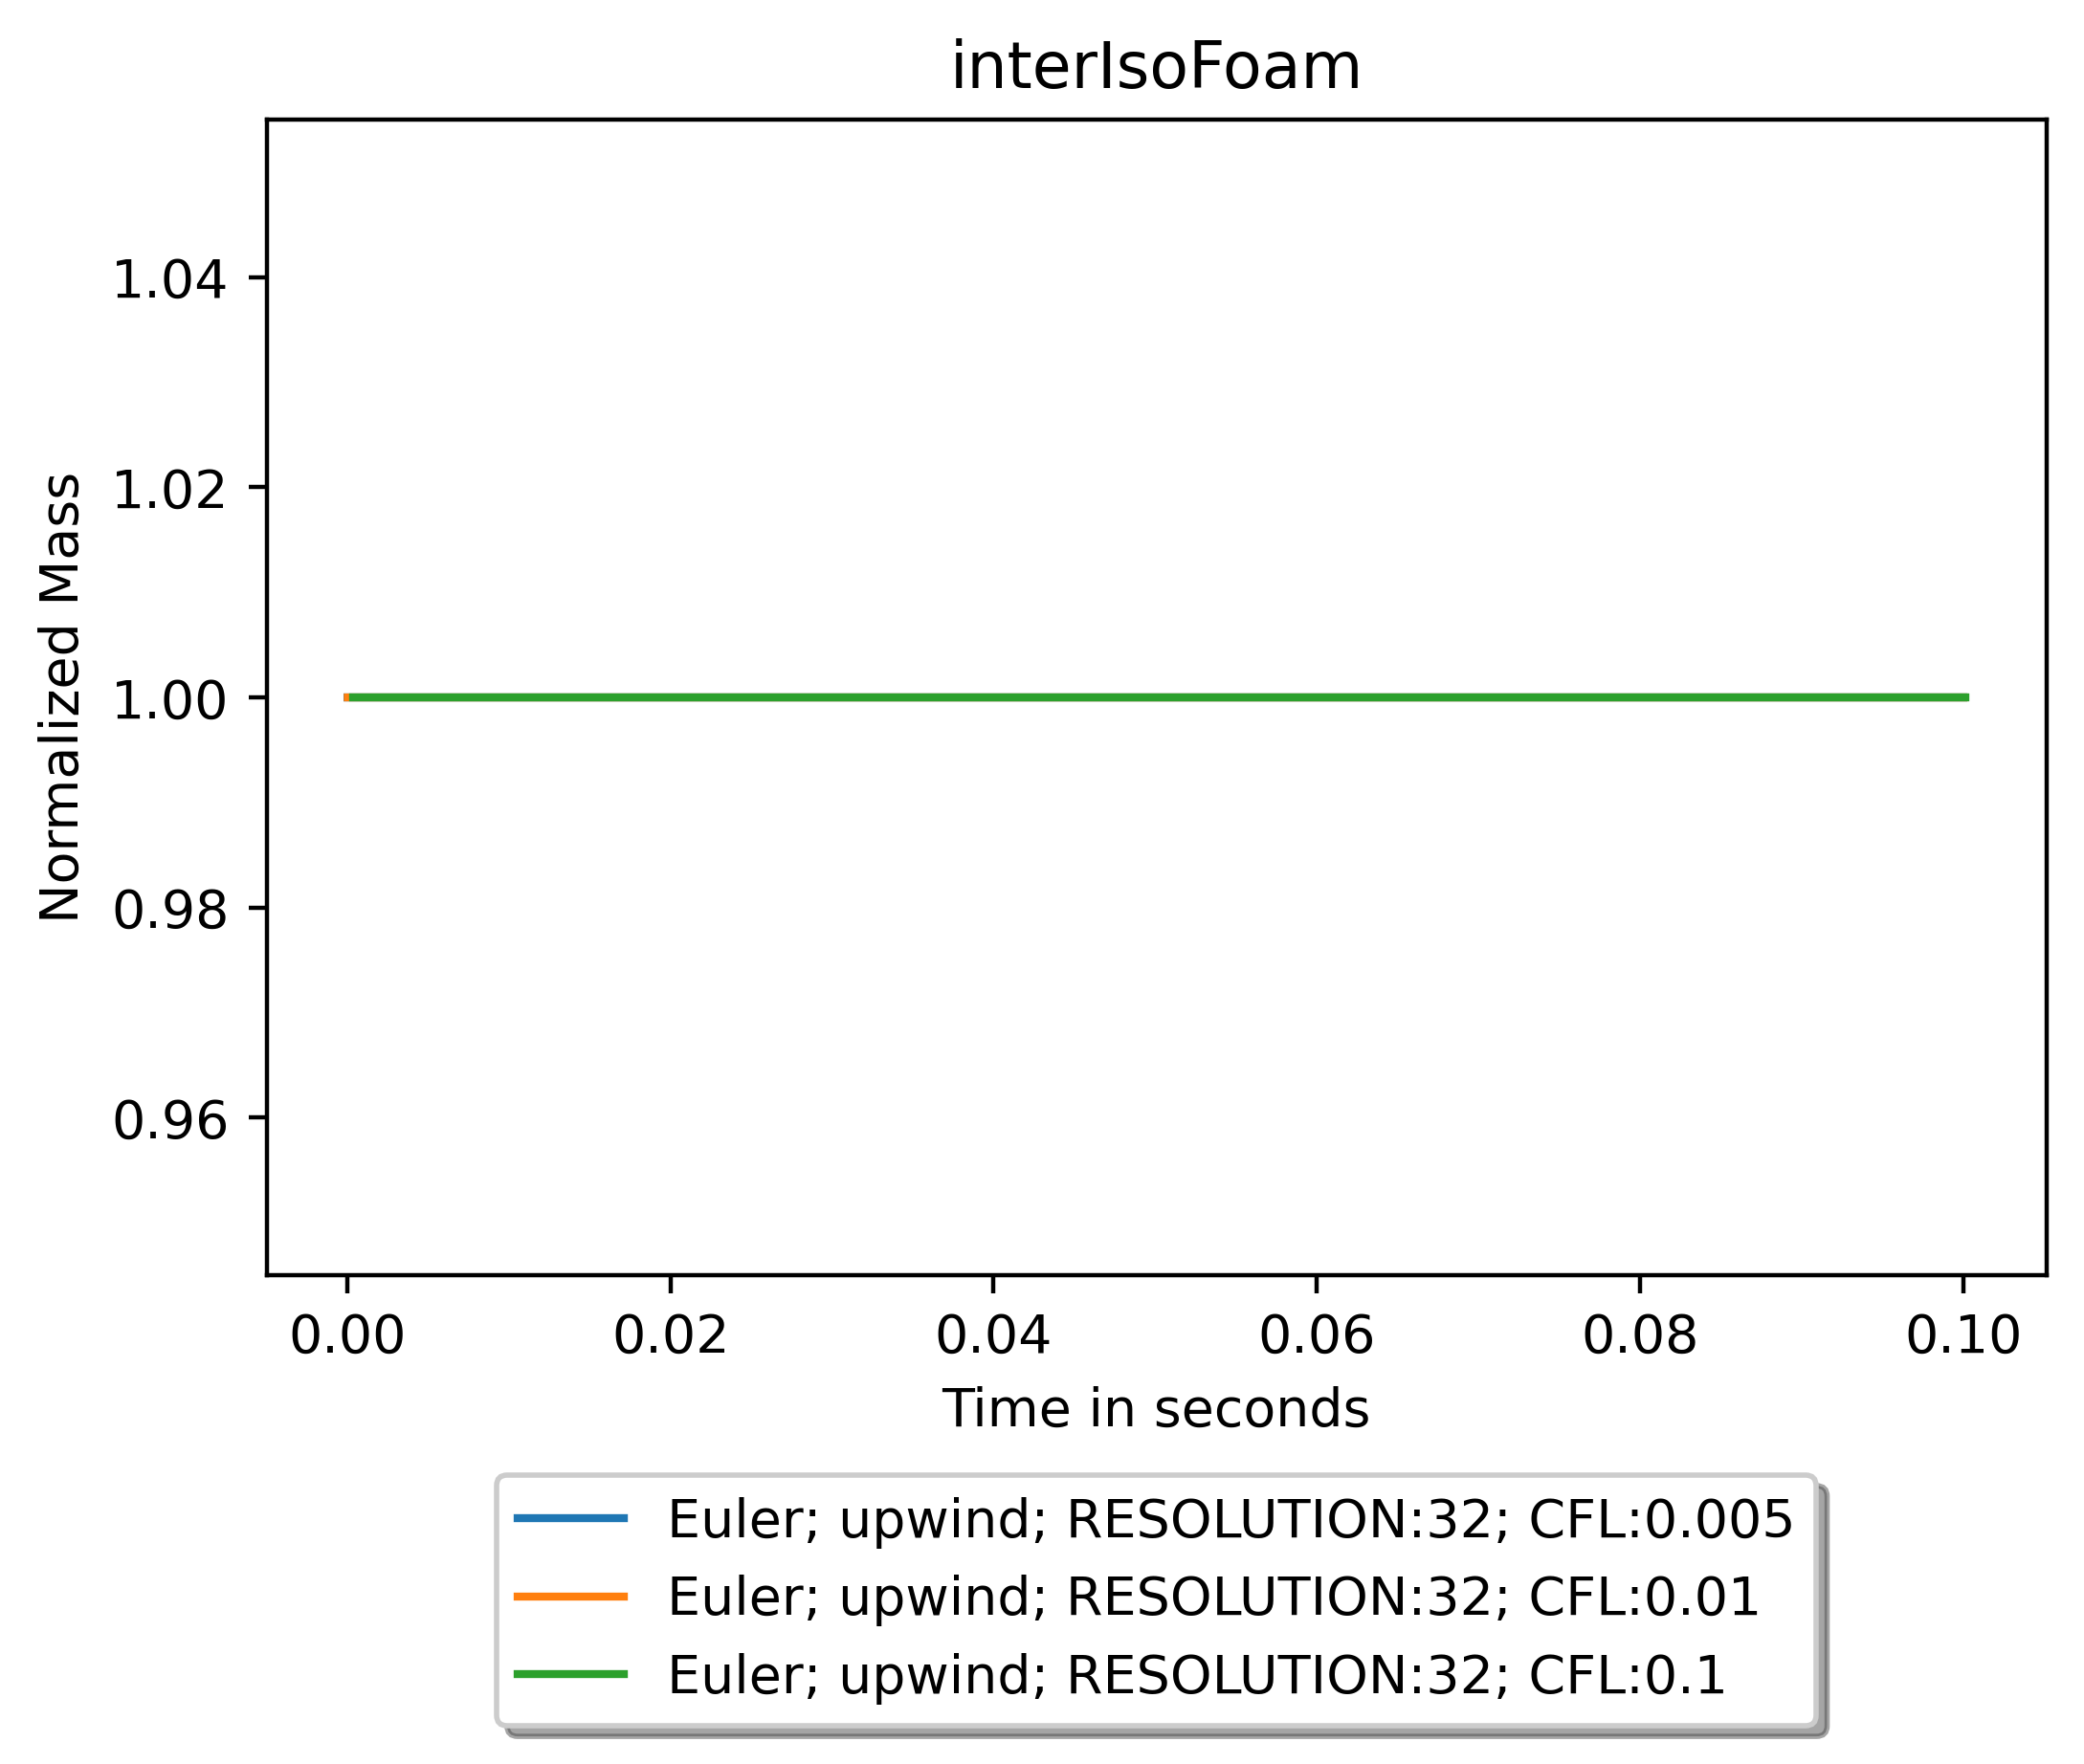

In [26]:
plot_NsumAlpha_dframe(dframe,'Euler','upwind','interIsoFoam')

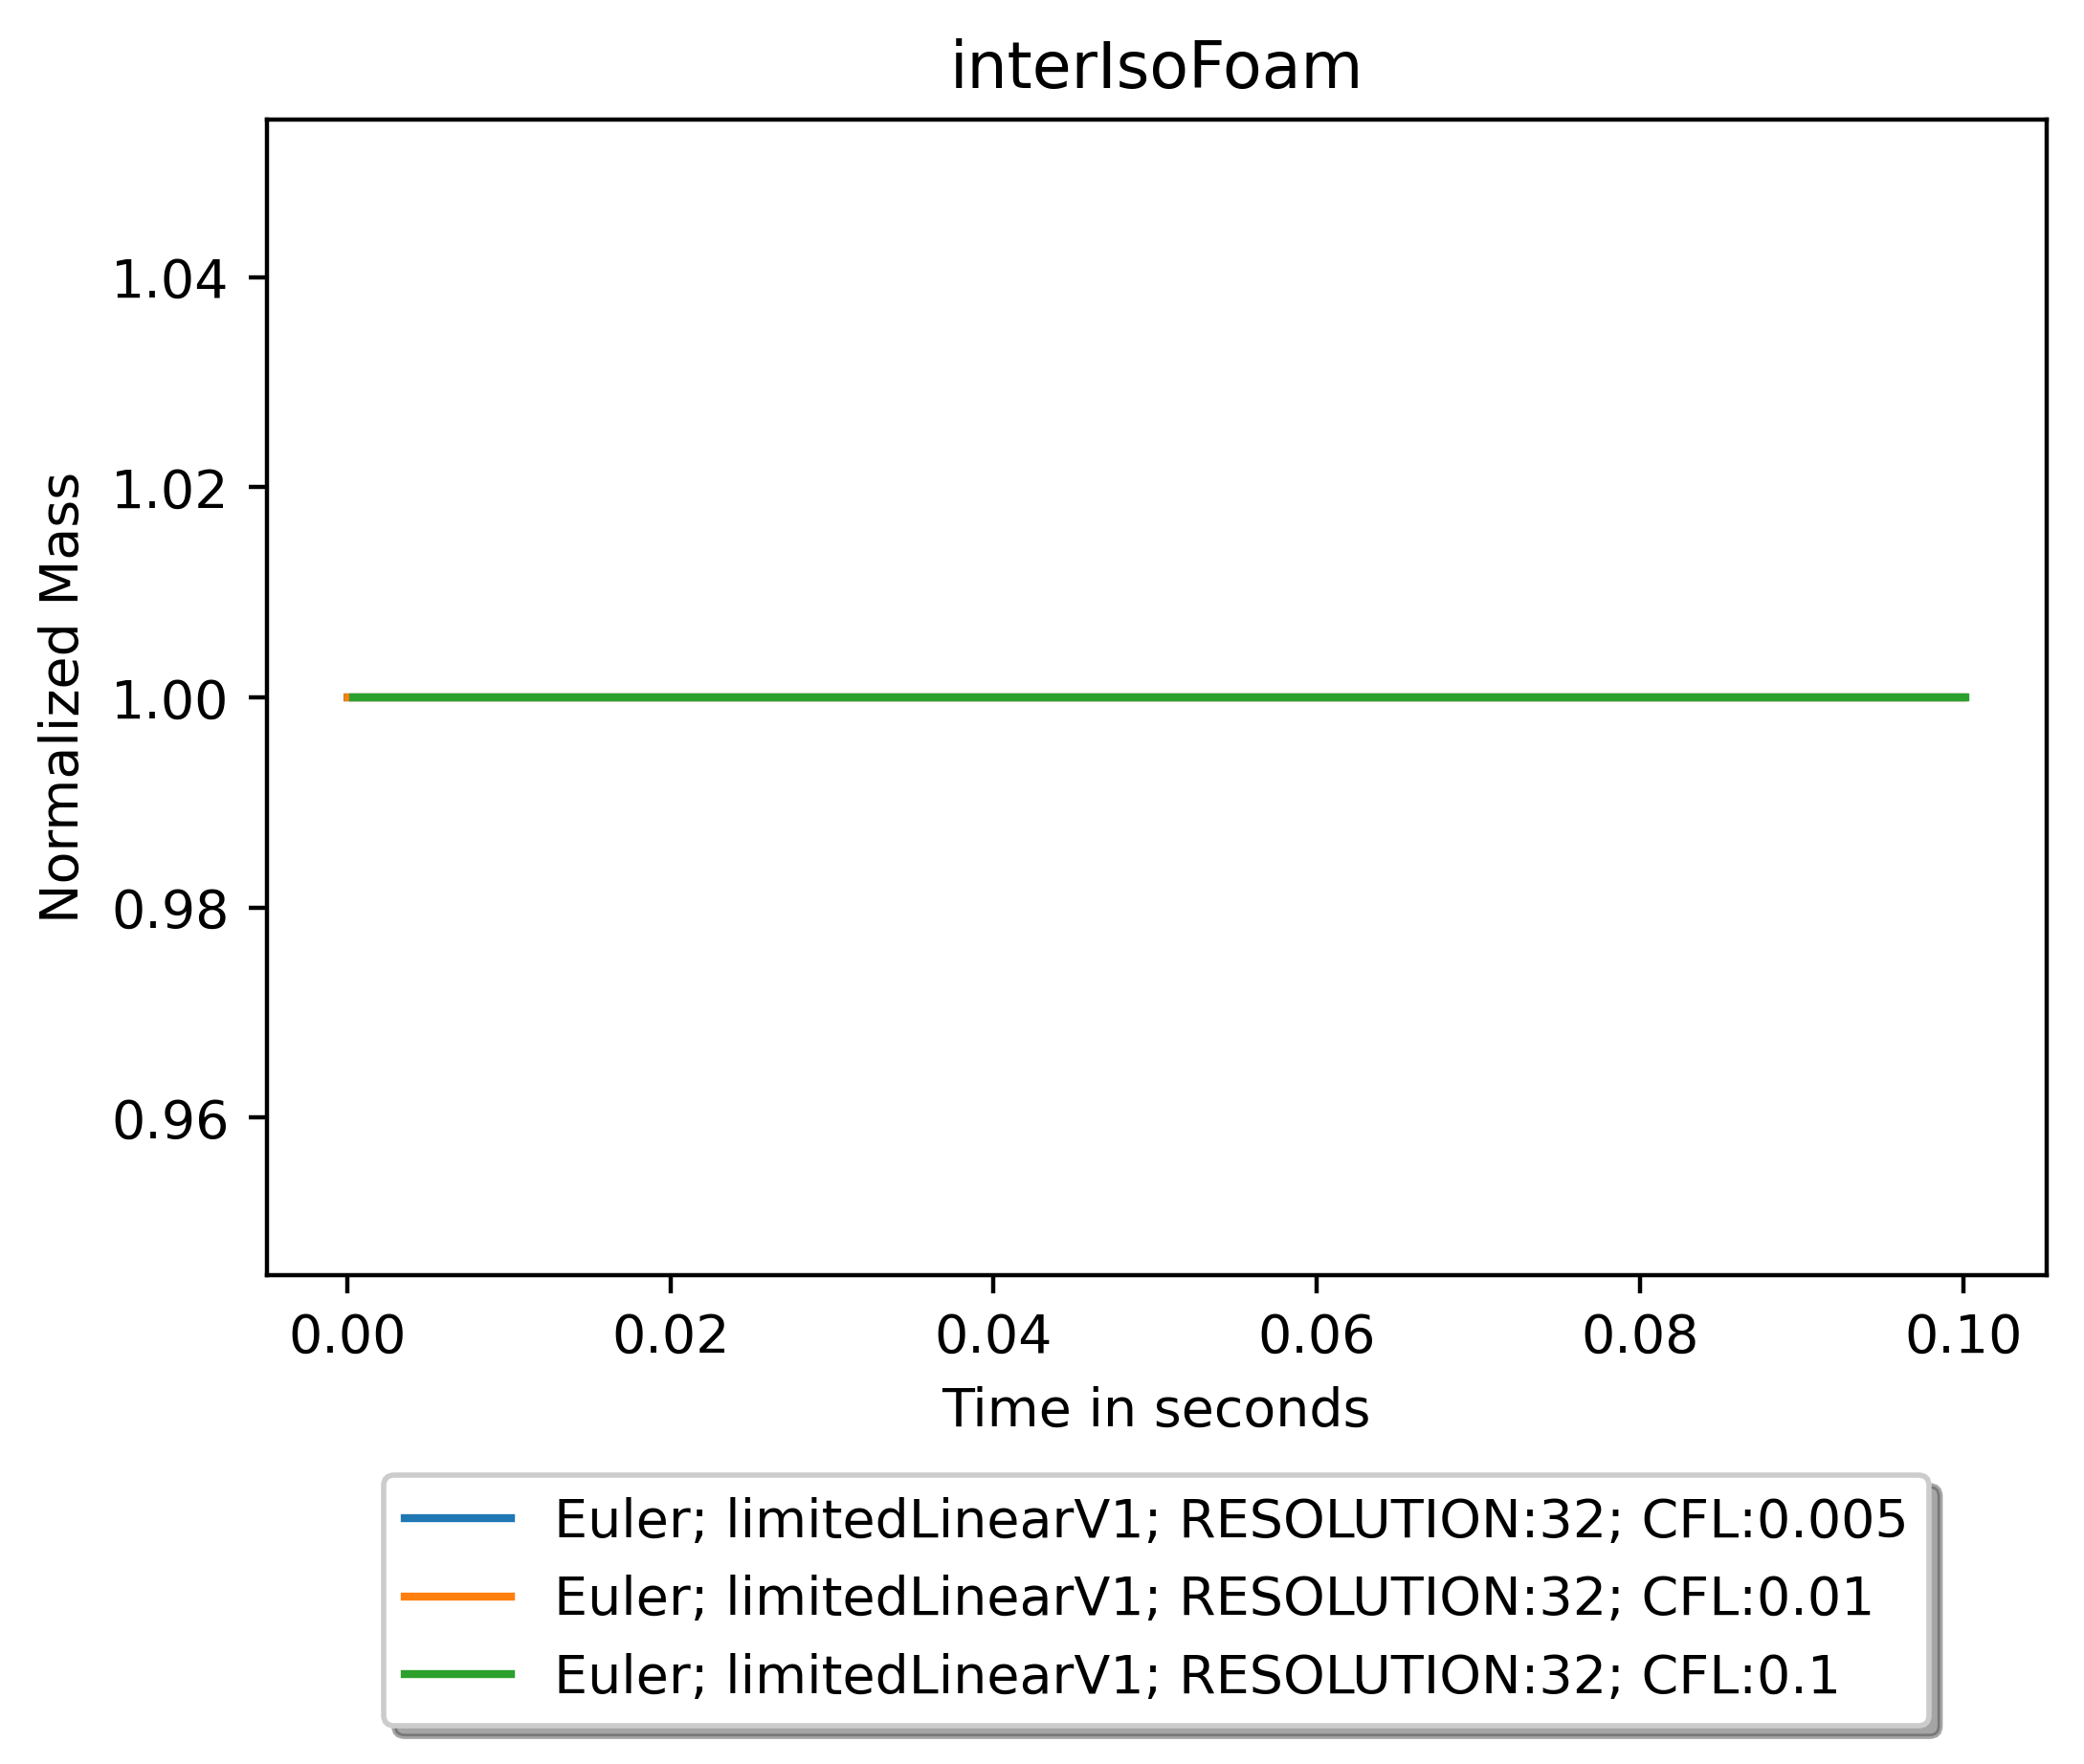

In [27]:
plot_NsumAlpha_dframe(dframe,'Euler','limitedLinearV1','interIsoFoam')

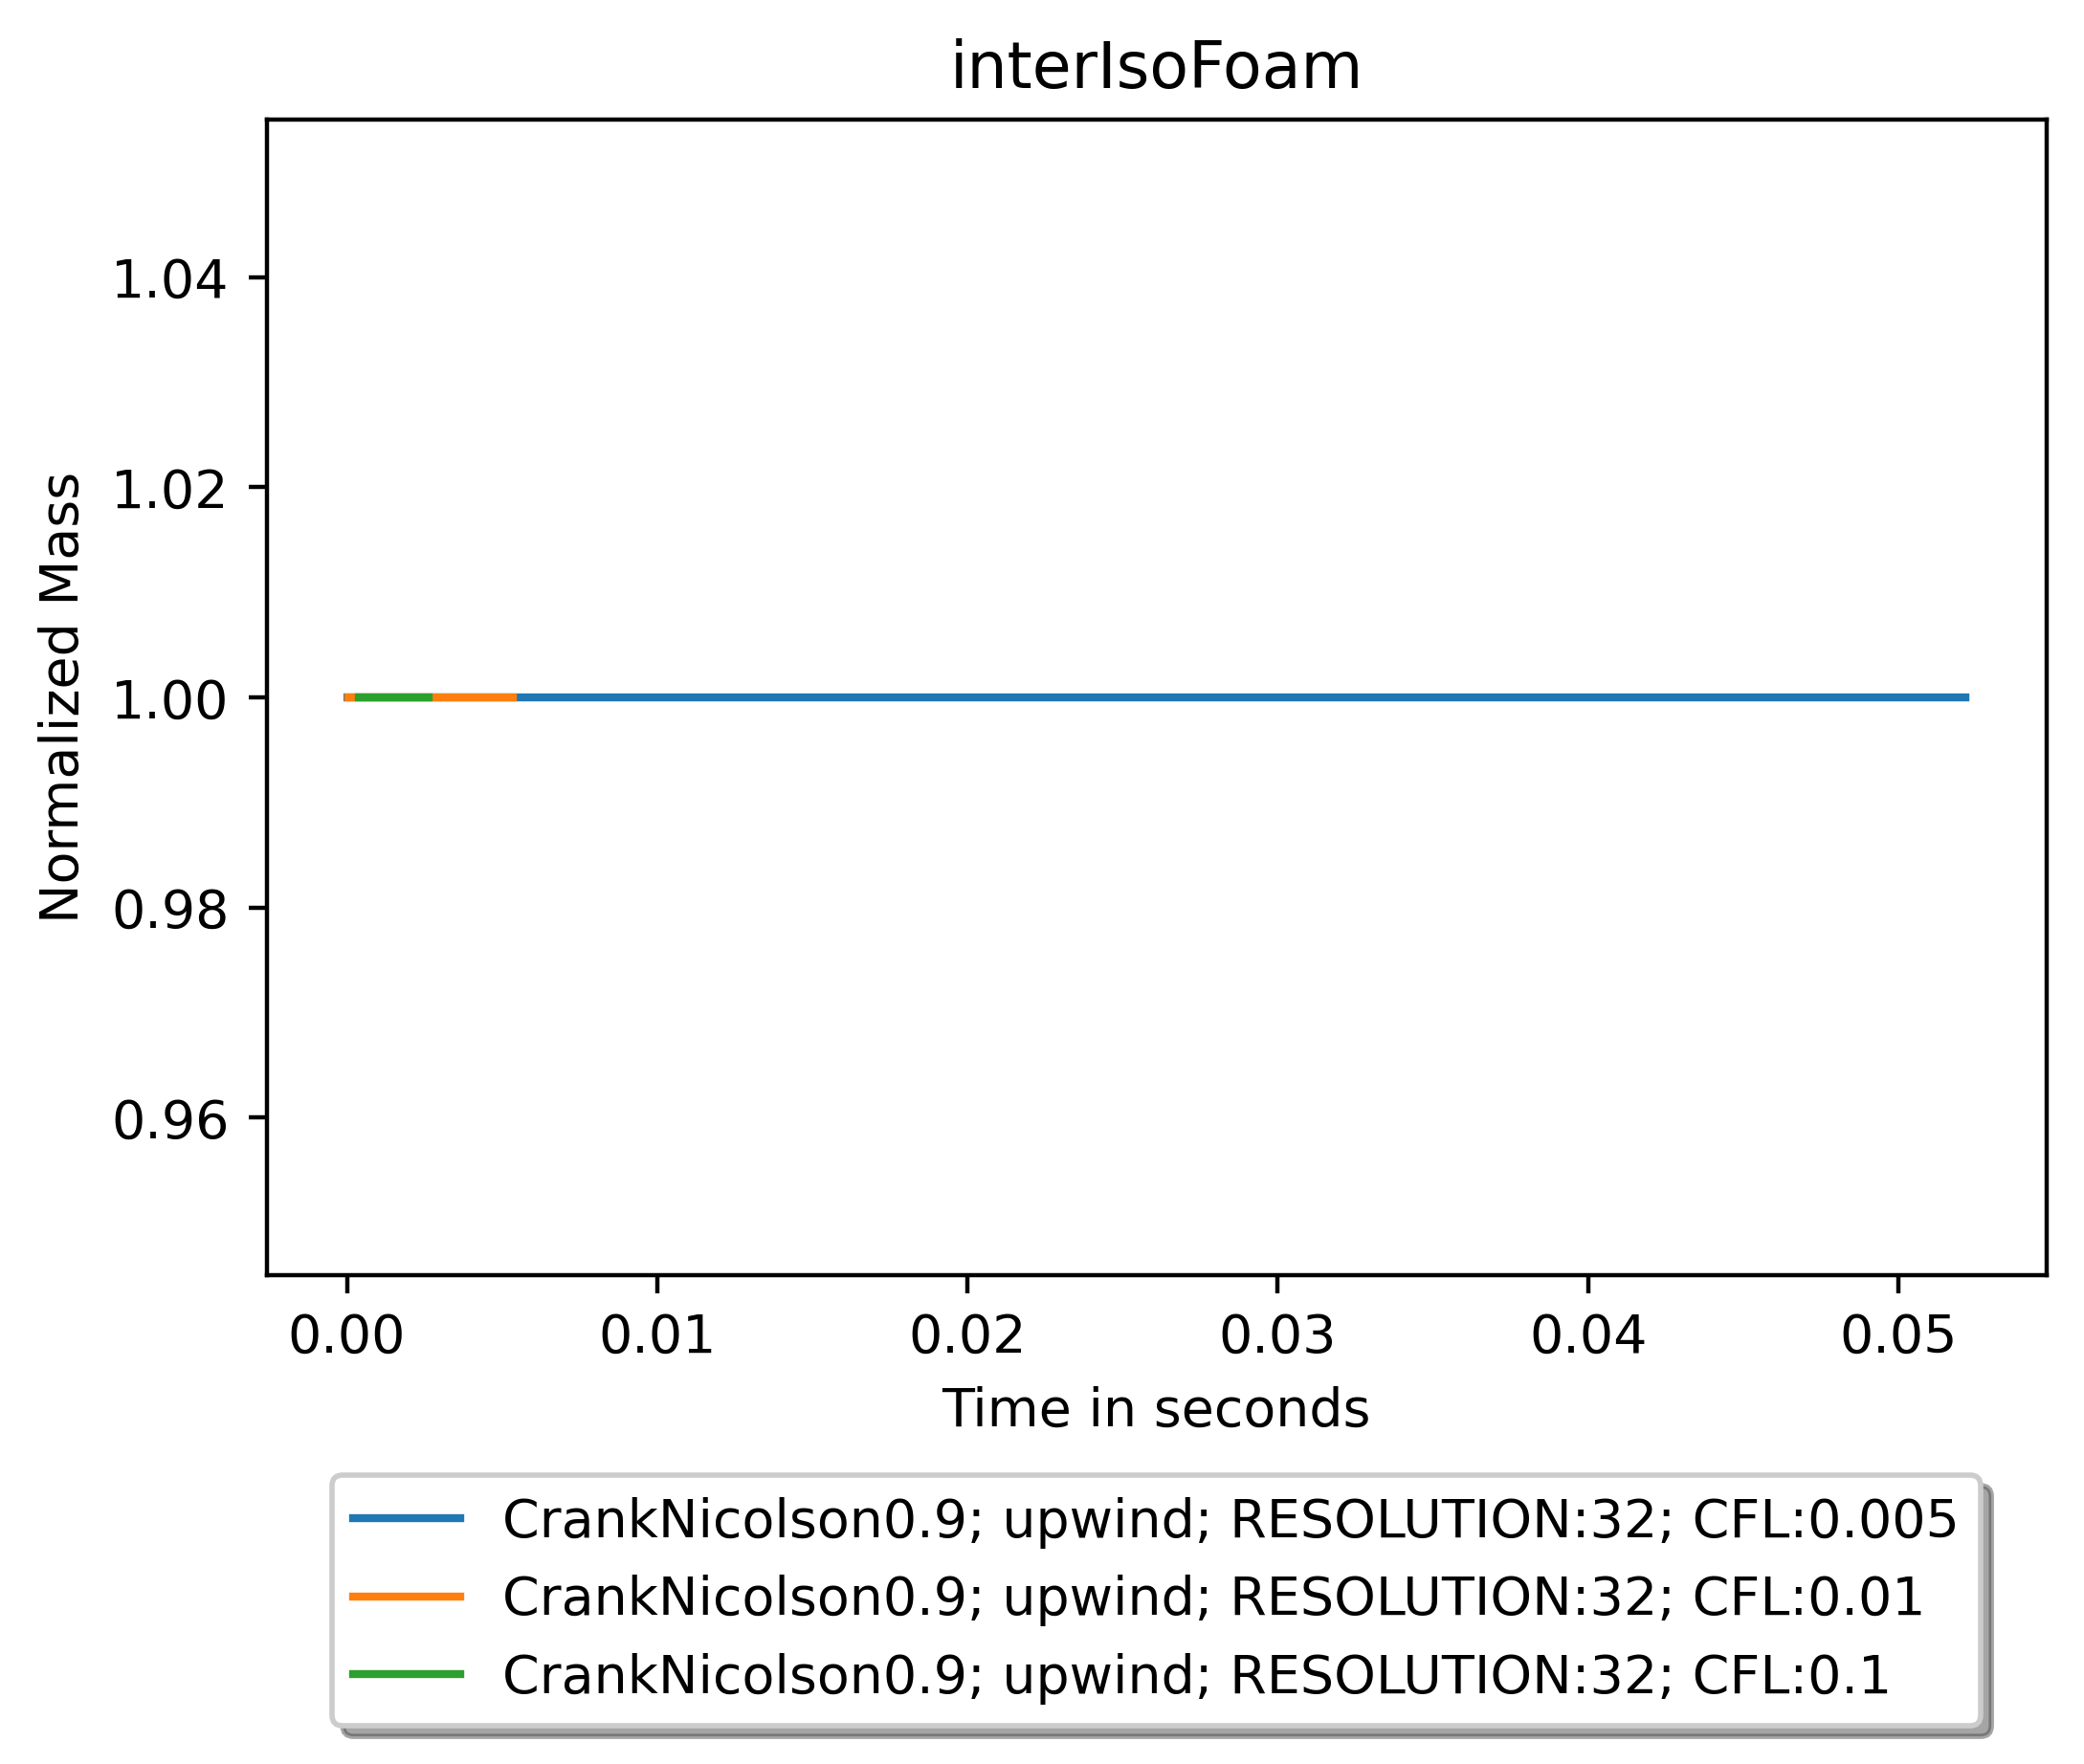

In [28]:
plot_NsumAlpha_dframe(dframe,'CrankNicolson0.9','upwind','interIsoFoam')

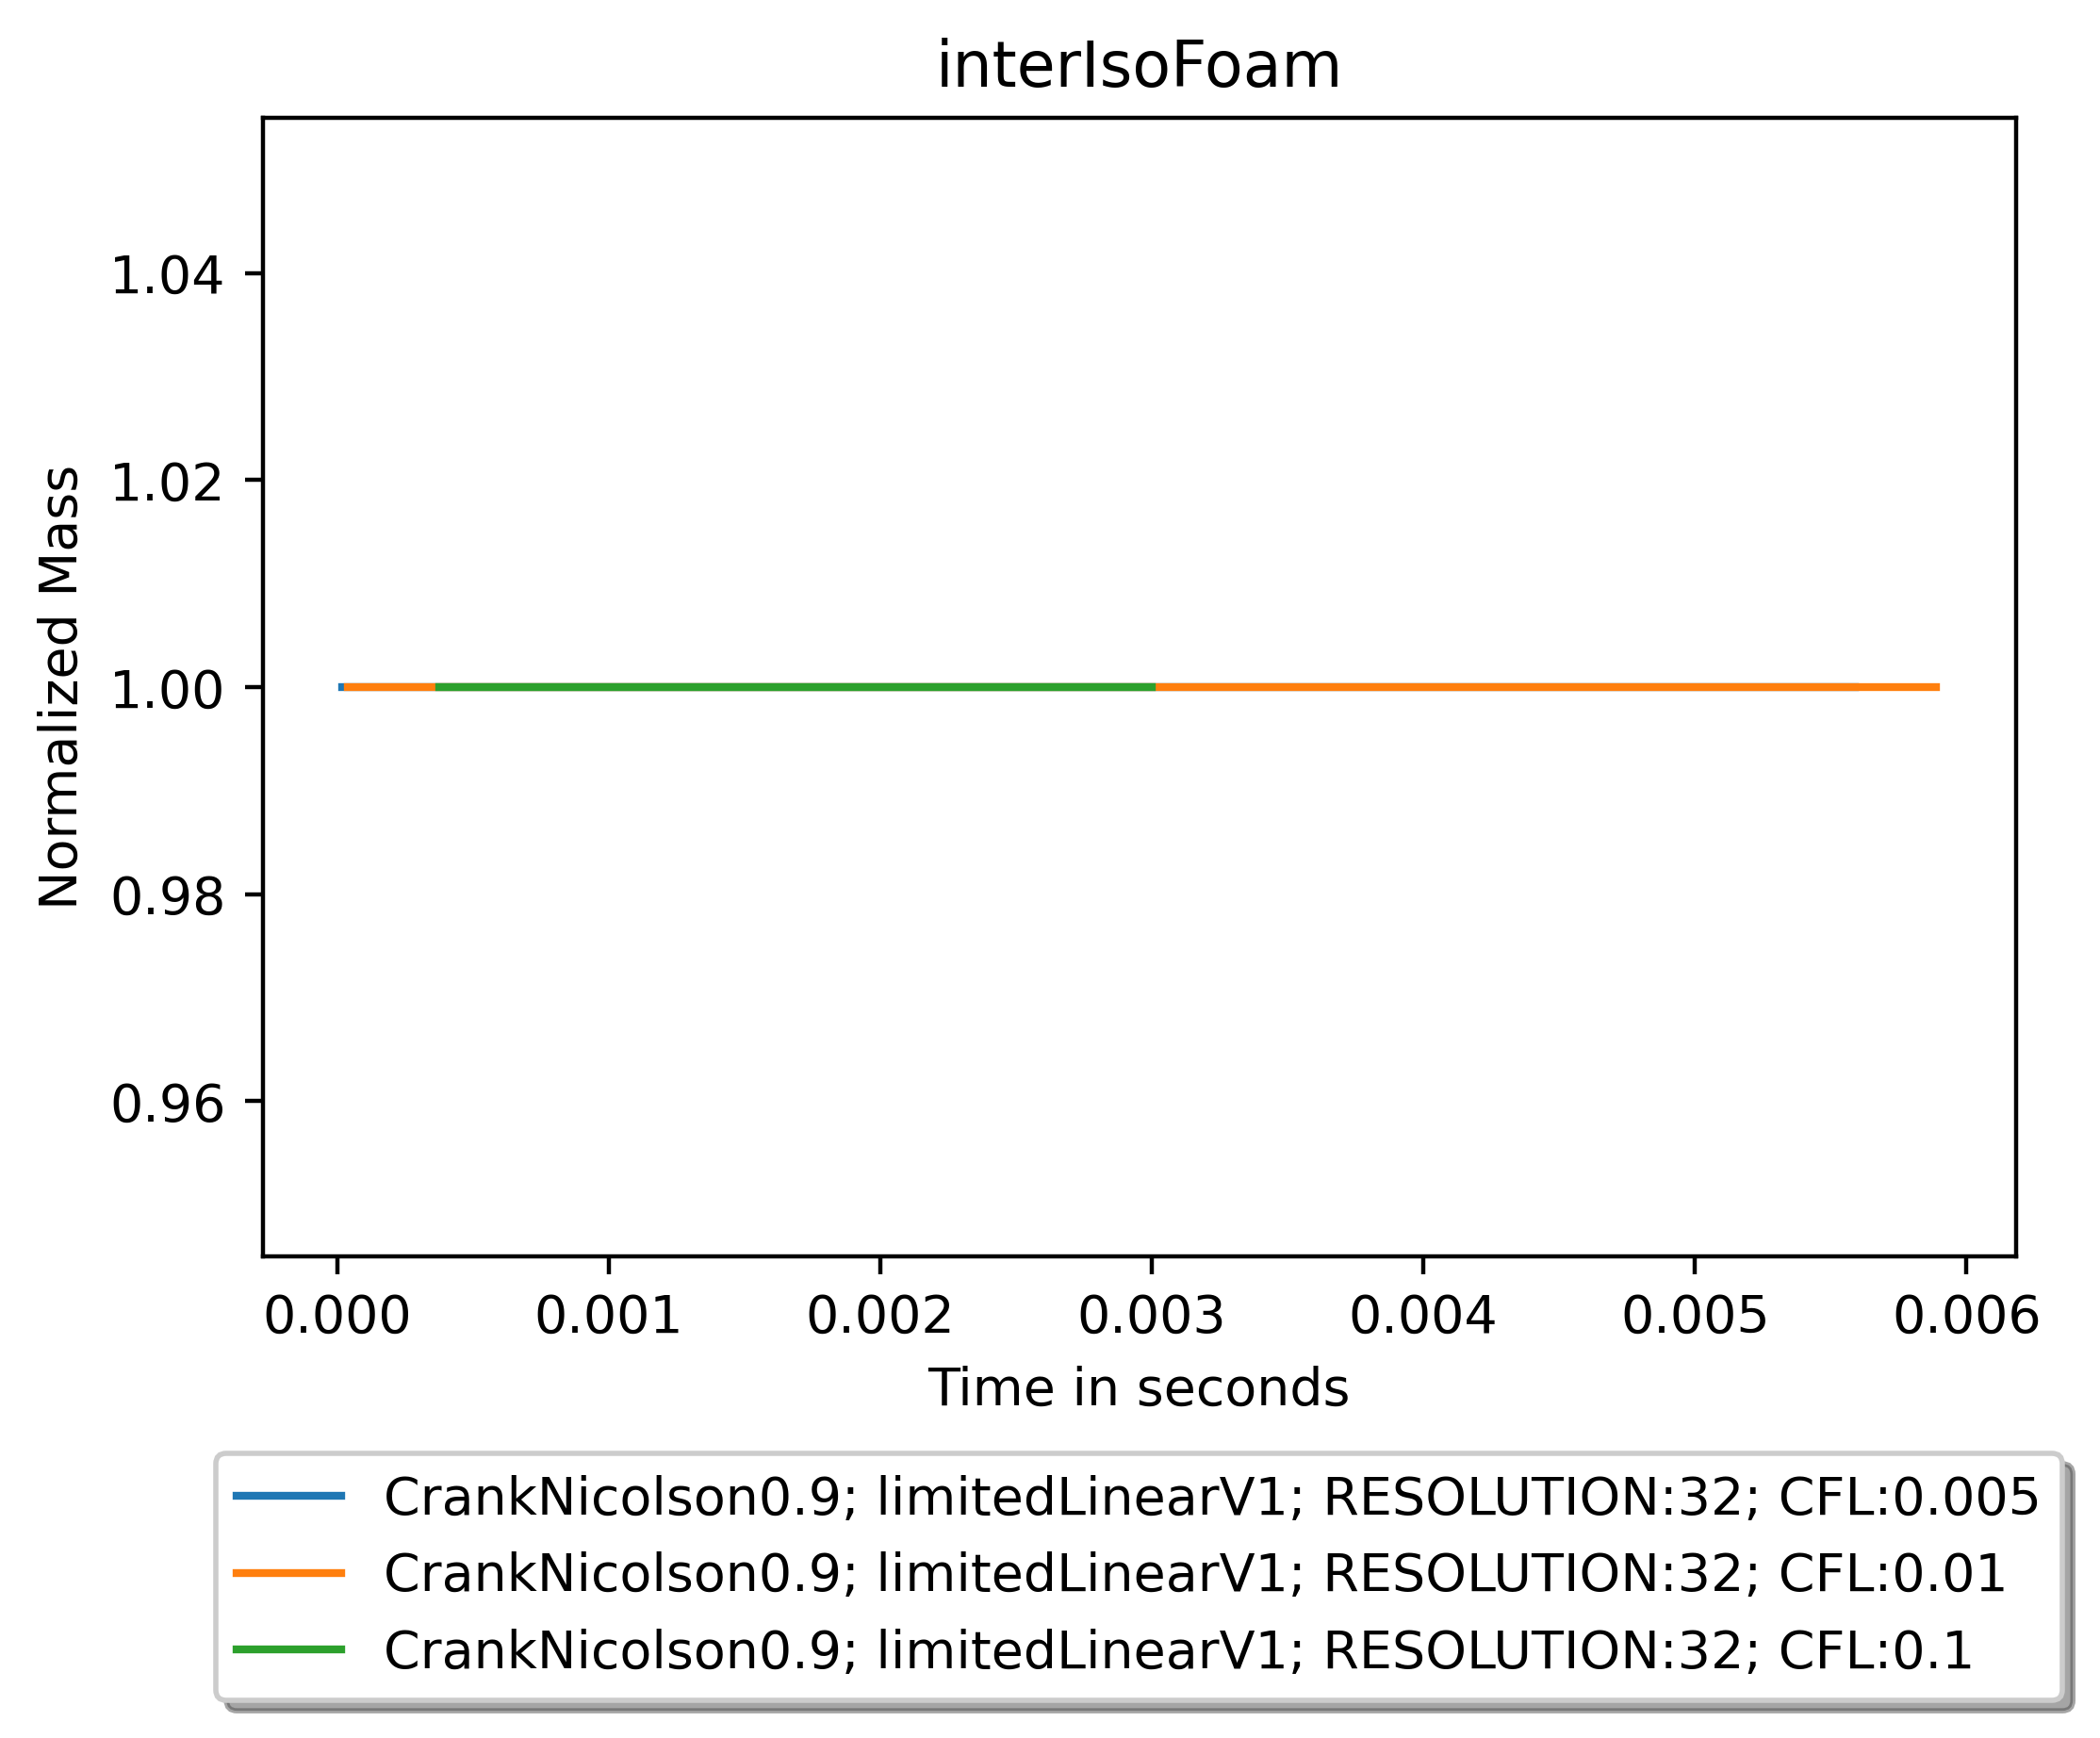

In [29]:
plot_NsumAlpha_dframe(dframe,'CrankNicolson0.9','limitedLinearV1','interIsoFoam')

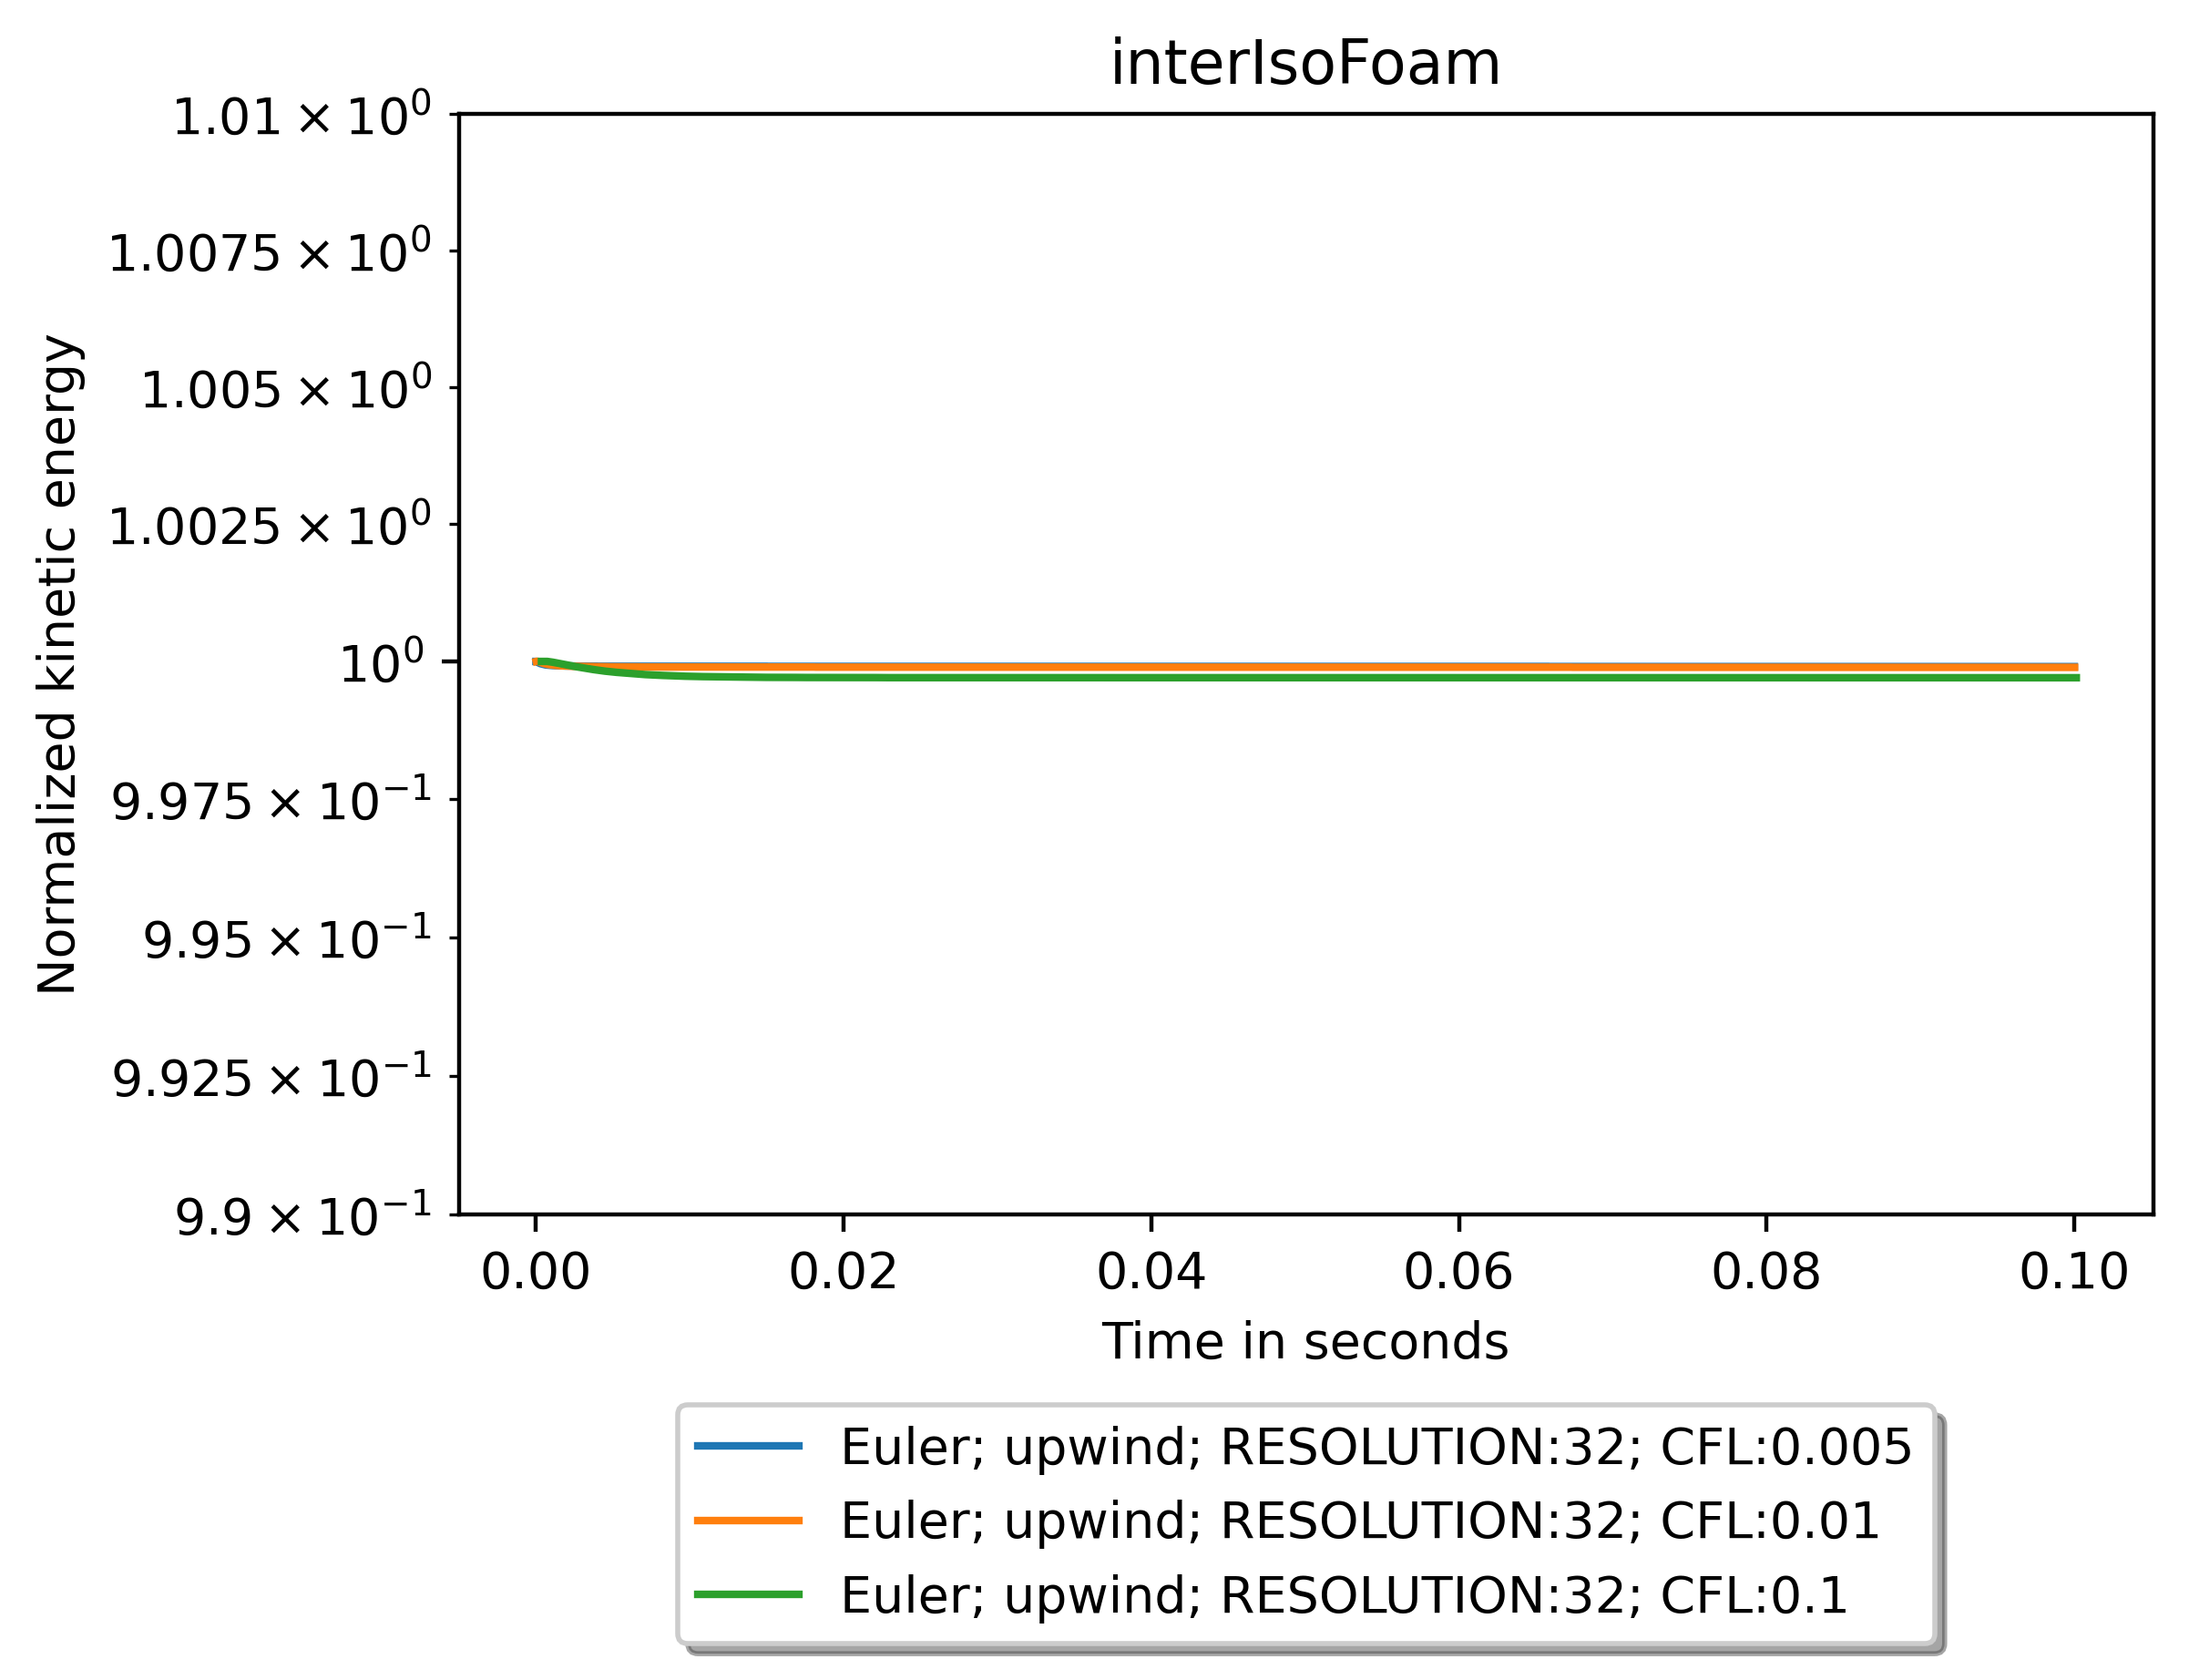

In [30]:
plot_NsumKinE_dframe(dframe,'Euler','upwind','interIsoFoam')

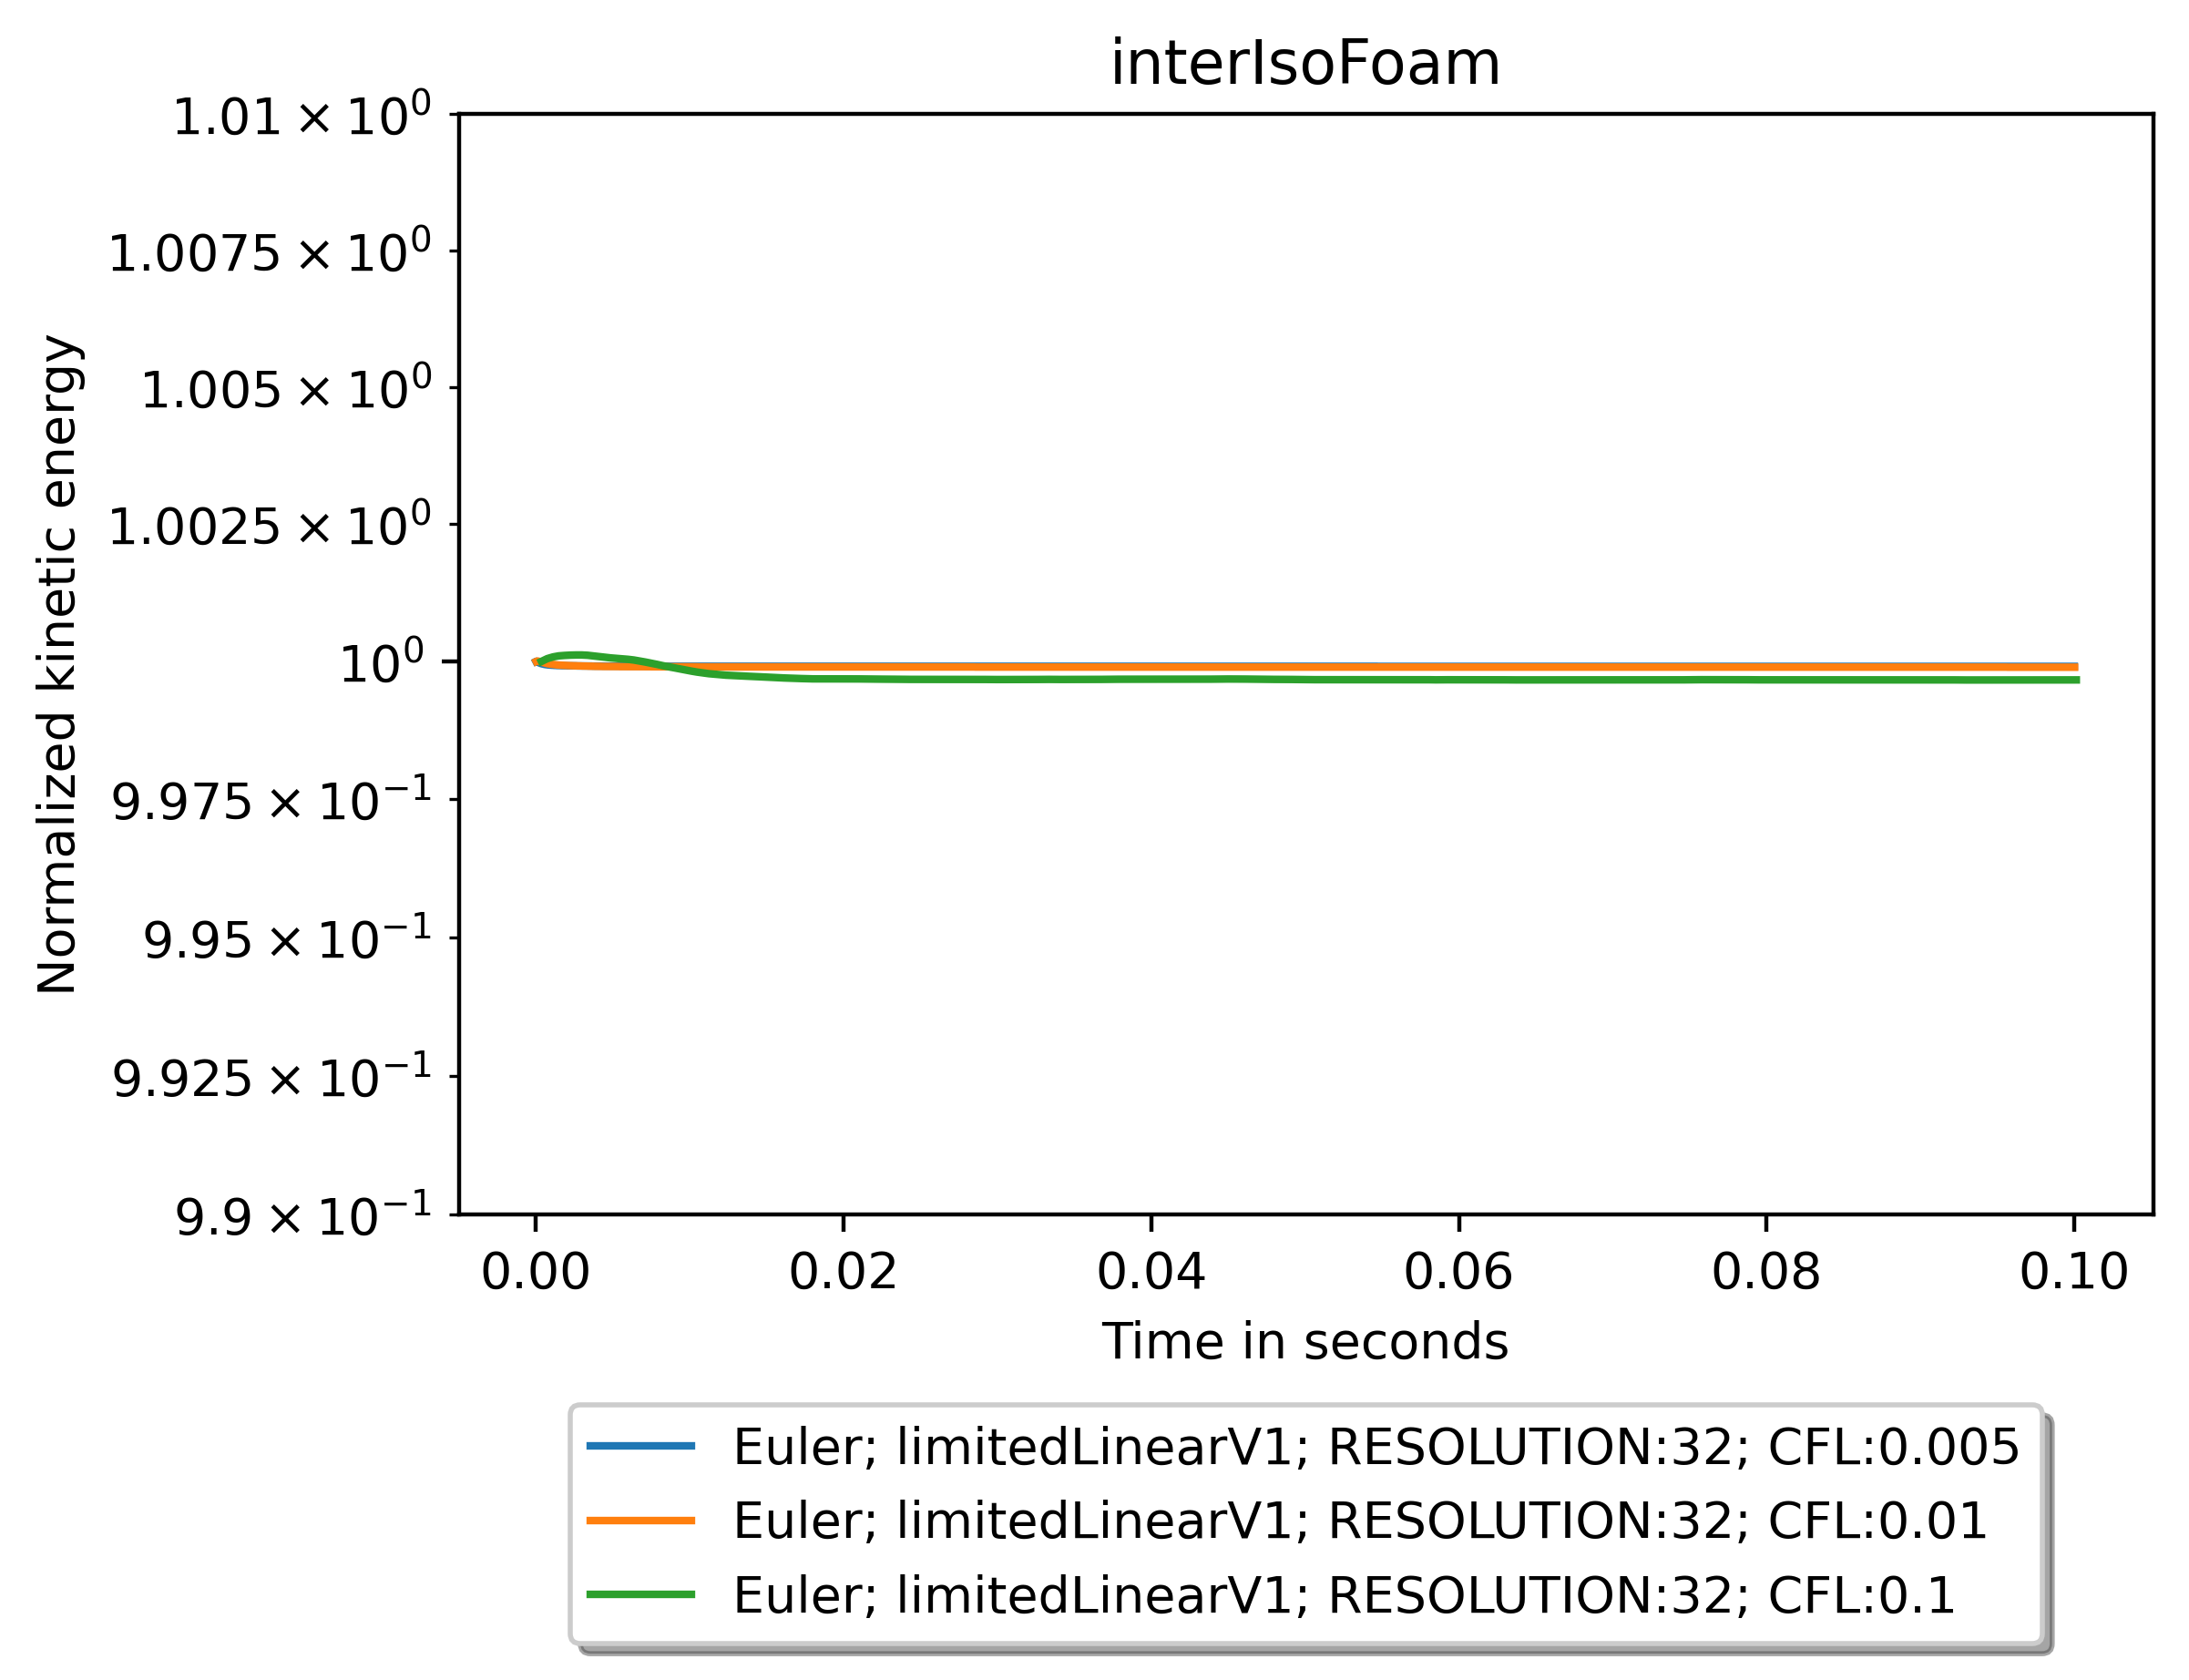

In [31]:
plot_NsumKinE_dframe(dframe,'Euler','limitedLinearV1','interIsoFoam')

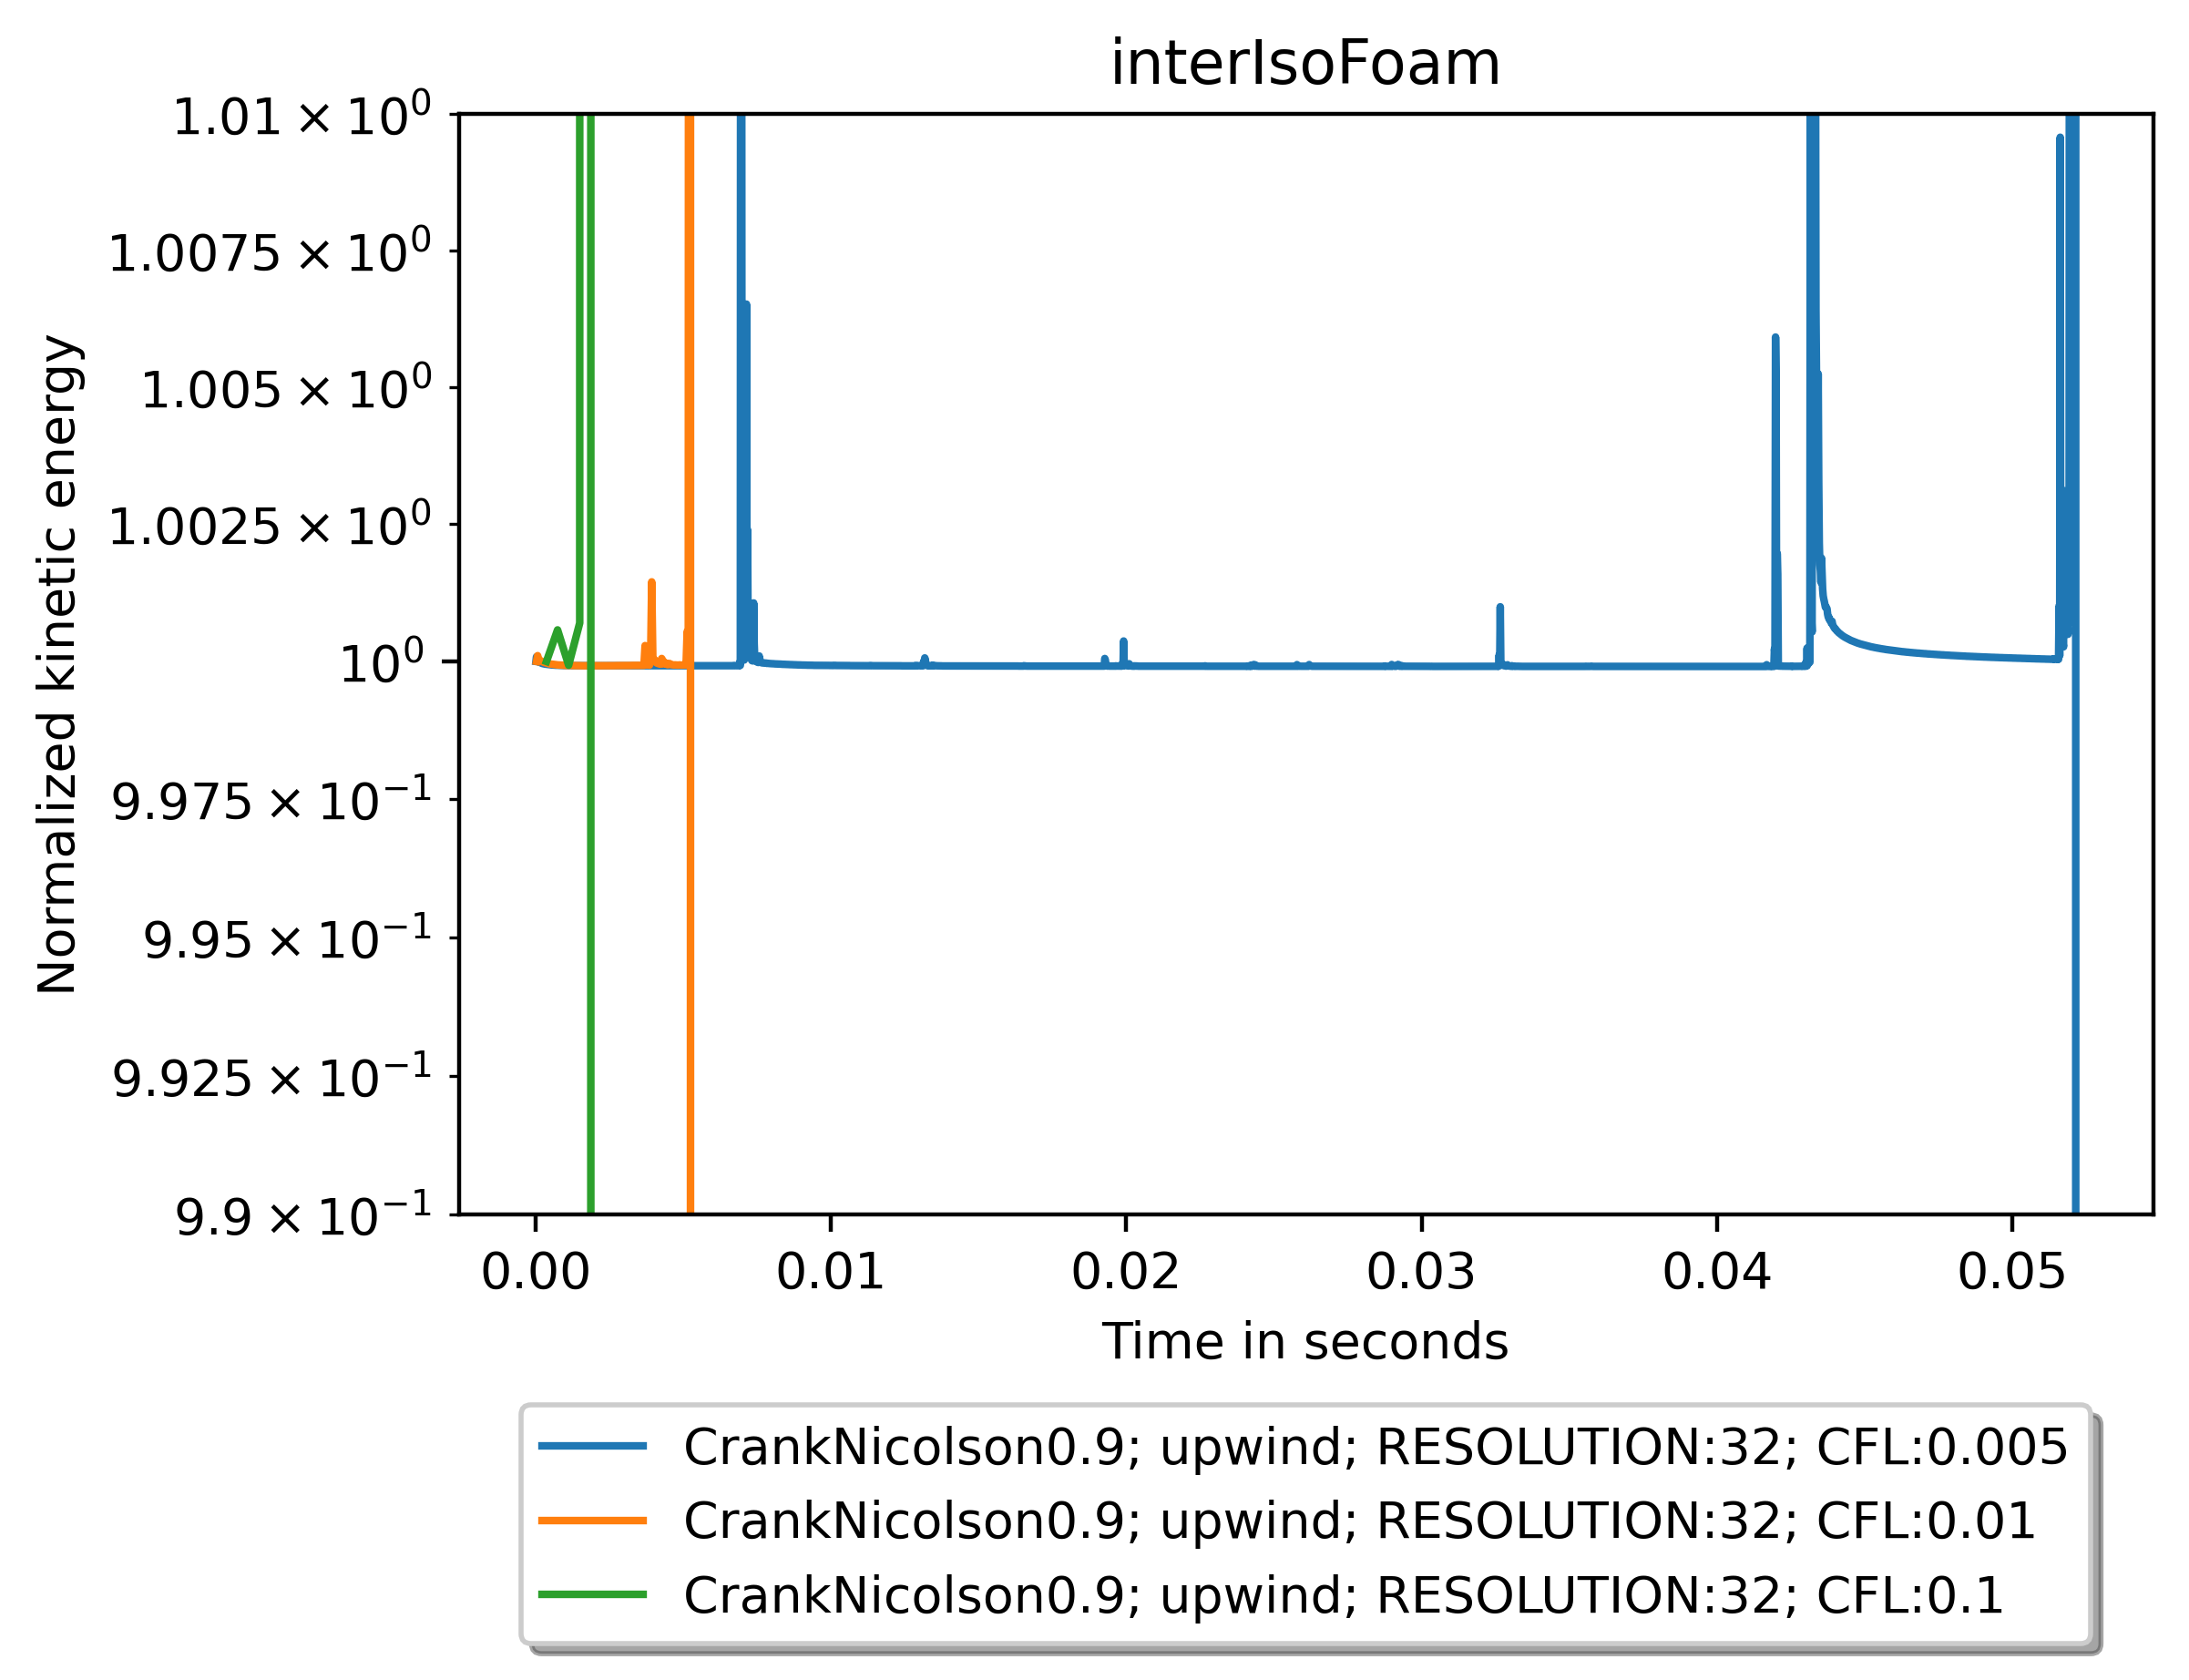

In [32]:
plot_NsumKinE_dframe(dframe,'CrankNicolson0.9','upwind','interIsoFoam')

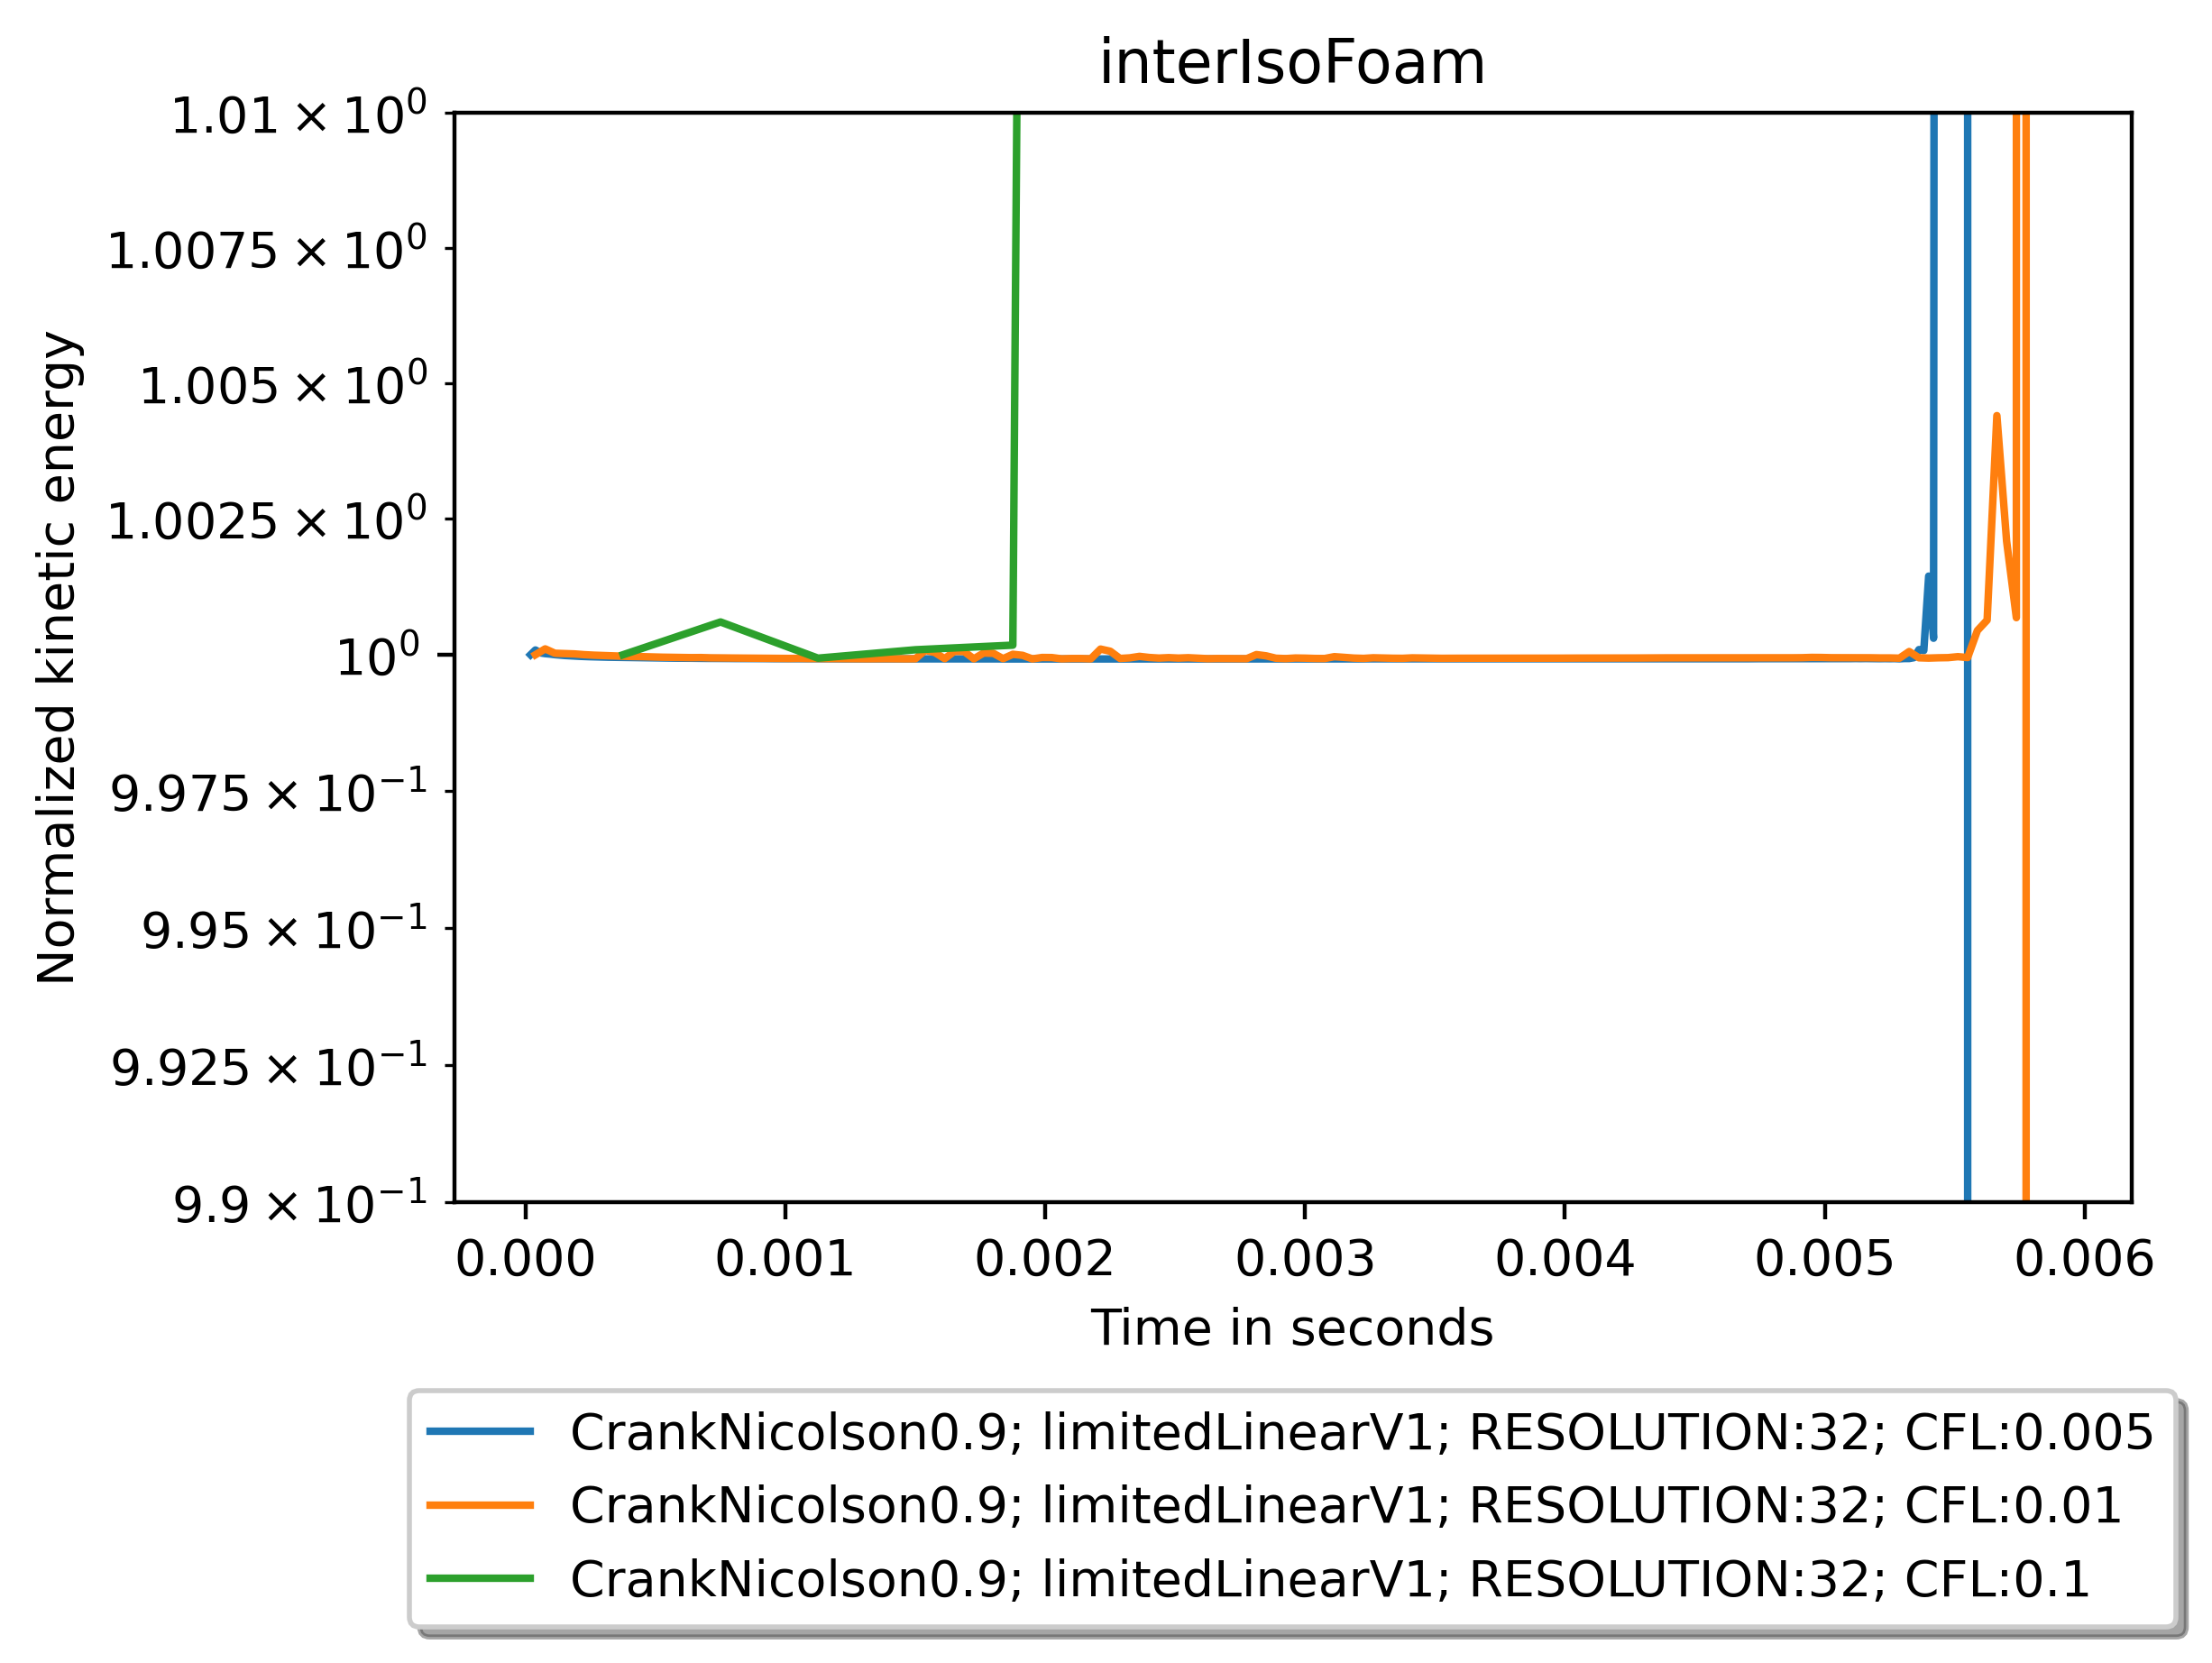

In [33]:
plot_NsumKinE_dframe(dframe,'CrankNicolson0.9','limitedLinearV1','interIsoFoam')

# interIsoRhoFoam

In [34]:
agglomerator = da.data_agglomerator("Zuzio2020.parameter","stationaryDropletResults.csv", 
                                     "./interIsoRhoFoam-Zuzio2020_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interIsoRhoFoam_Zuzio2020.csv")
dframe = agglomerator.study_dataframe()
dframe = dframe.sort_index()
dframe = dframe.loc[dframe.index.get_level_values('CFL_num') <= 0.1]

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['placeholder.stl'], [0.150001], [0.500007], [0.500007], [0.500007], ['CrankNicolson0.9', 'Euler'], ['limitedLinearV1', 'upwind'], [0.1], [0.005, 0.01, 0.1, 0.5], [32], [0], [0], [10], [0.0], [0.0], [1.0], [0.0], [1000000.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'timeSchemes', 'fluxSchemes', 'end_time', 'CFL_num', 'resolution', 'y_velocity', 'x_velocity', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient', 'rho_ambient', 'nu_droplet', 'rho_droplet', 'step']


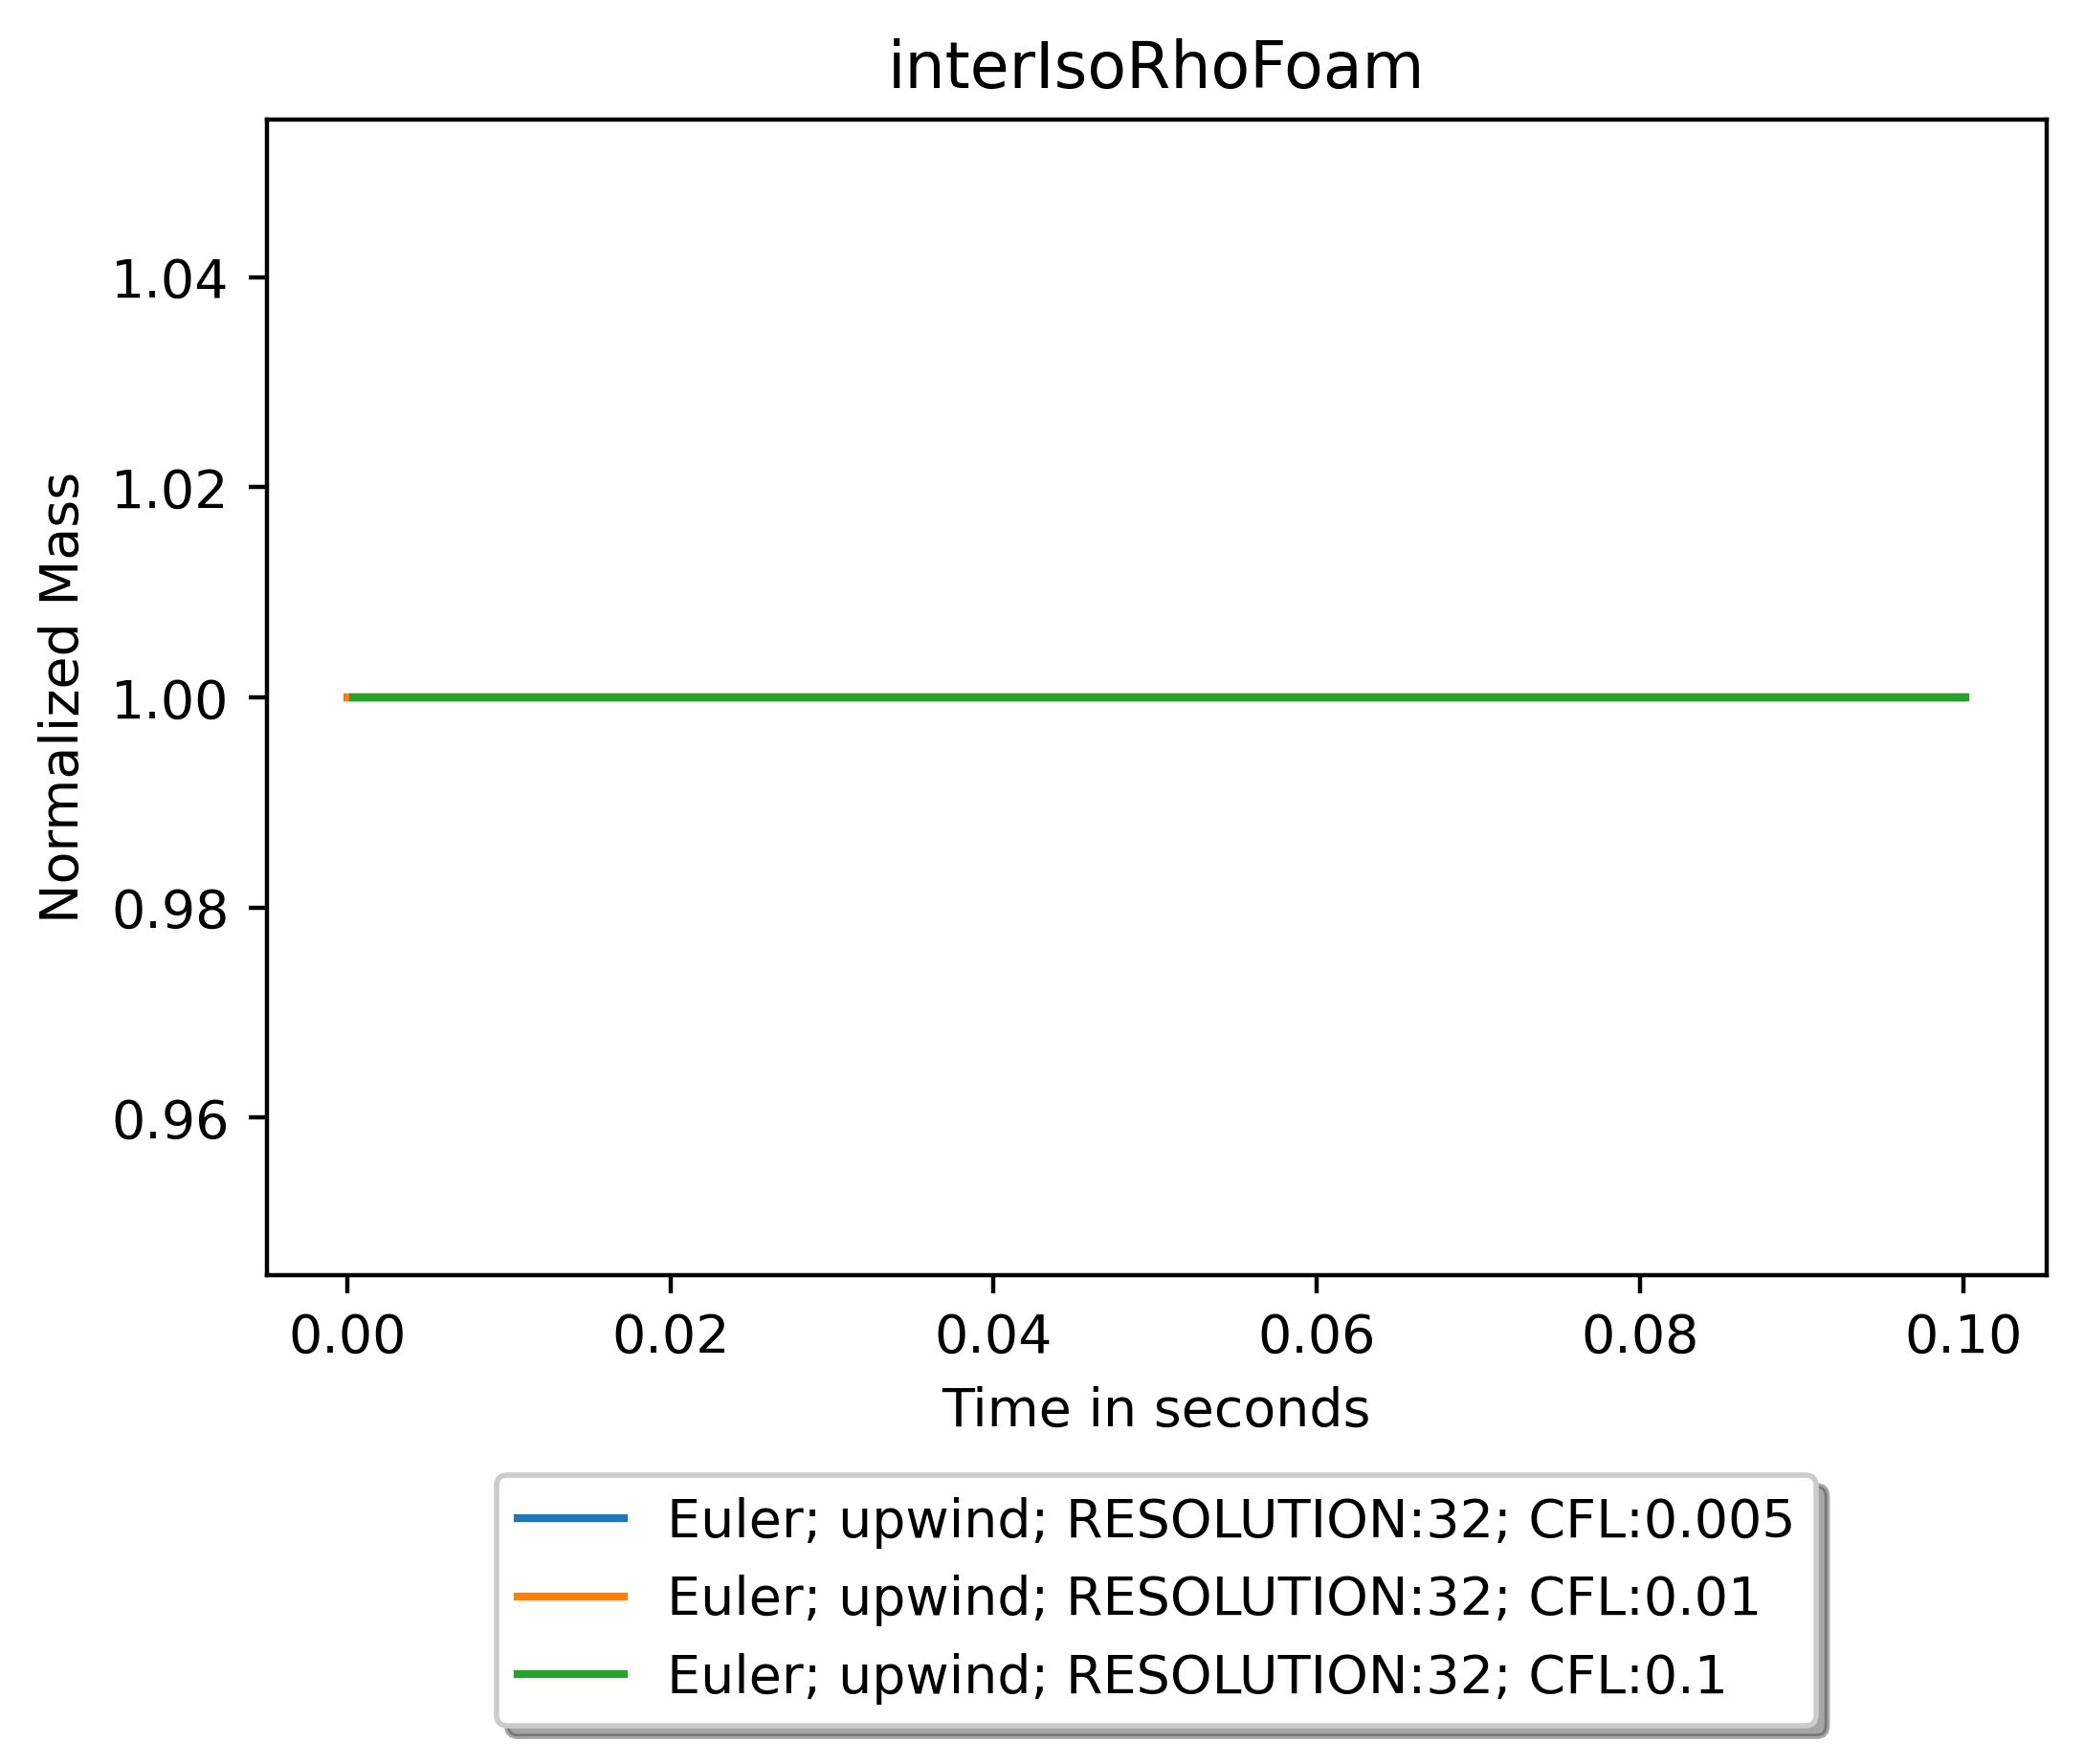

In [35]:
plot_NsumAlpha_dframe(dframe,'Euler','upwind','interIsoRhoFoam')

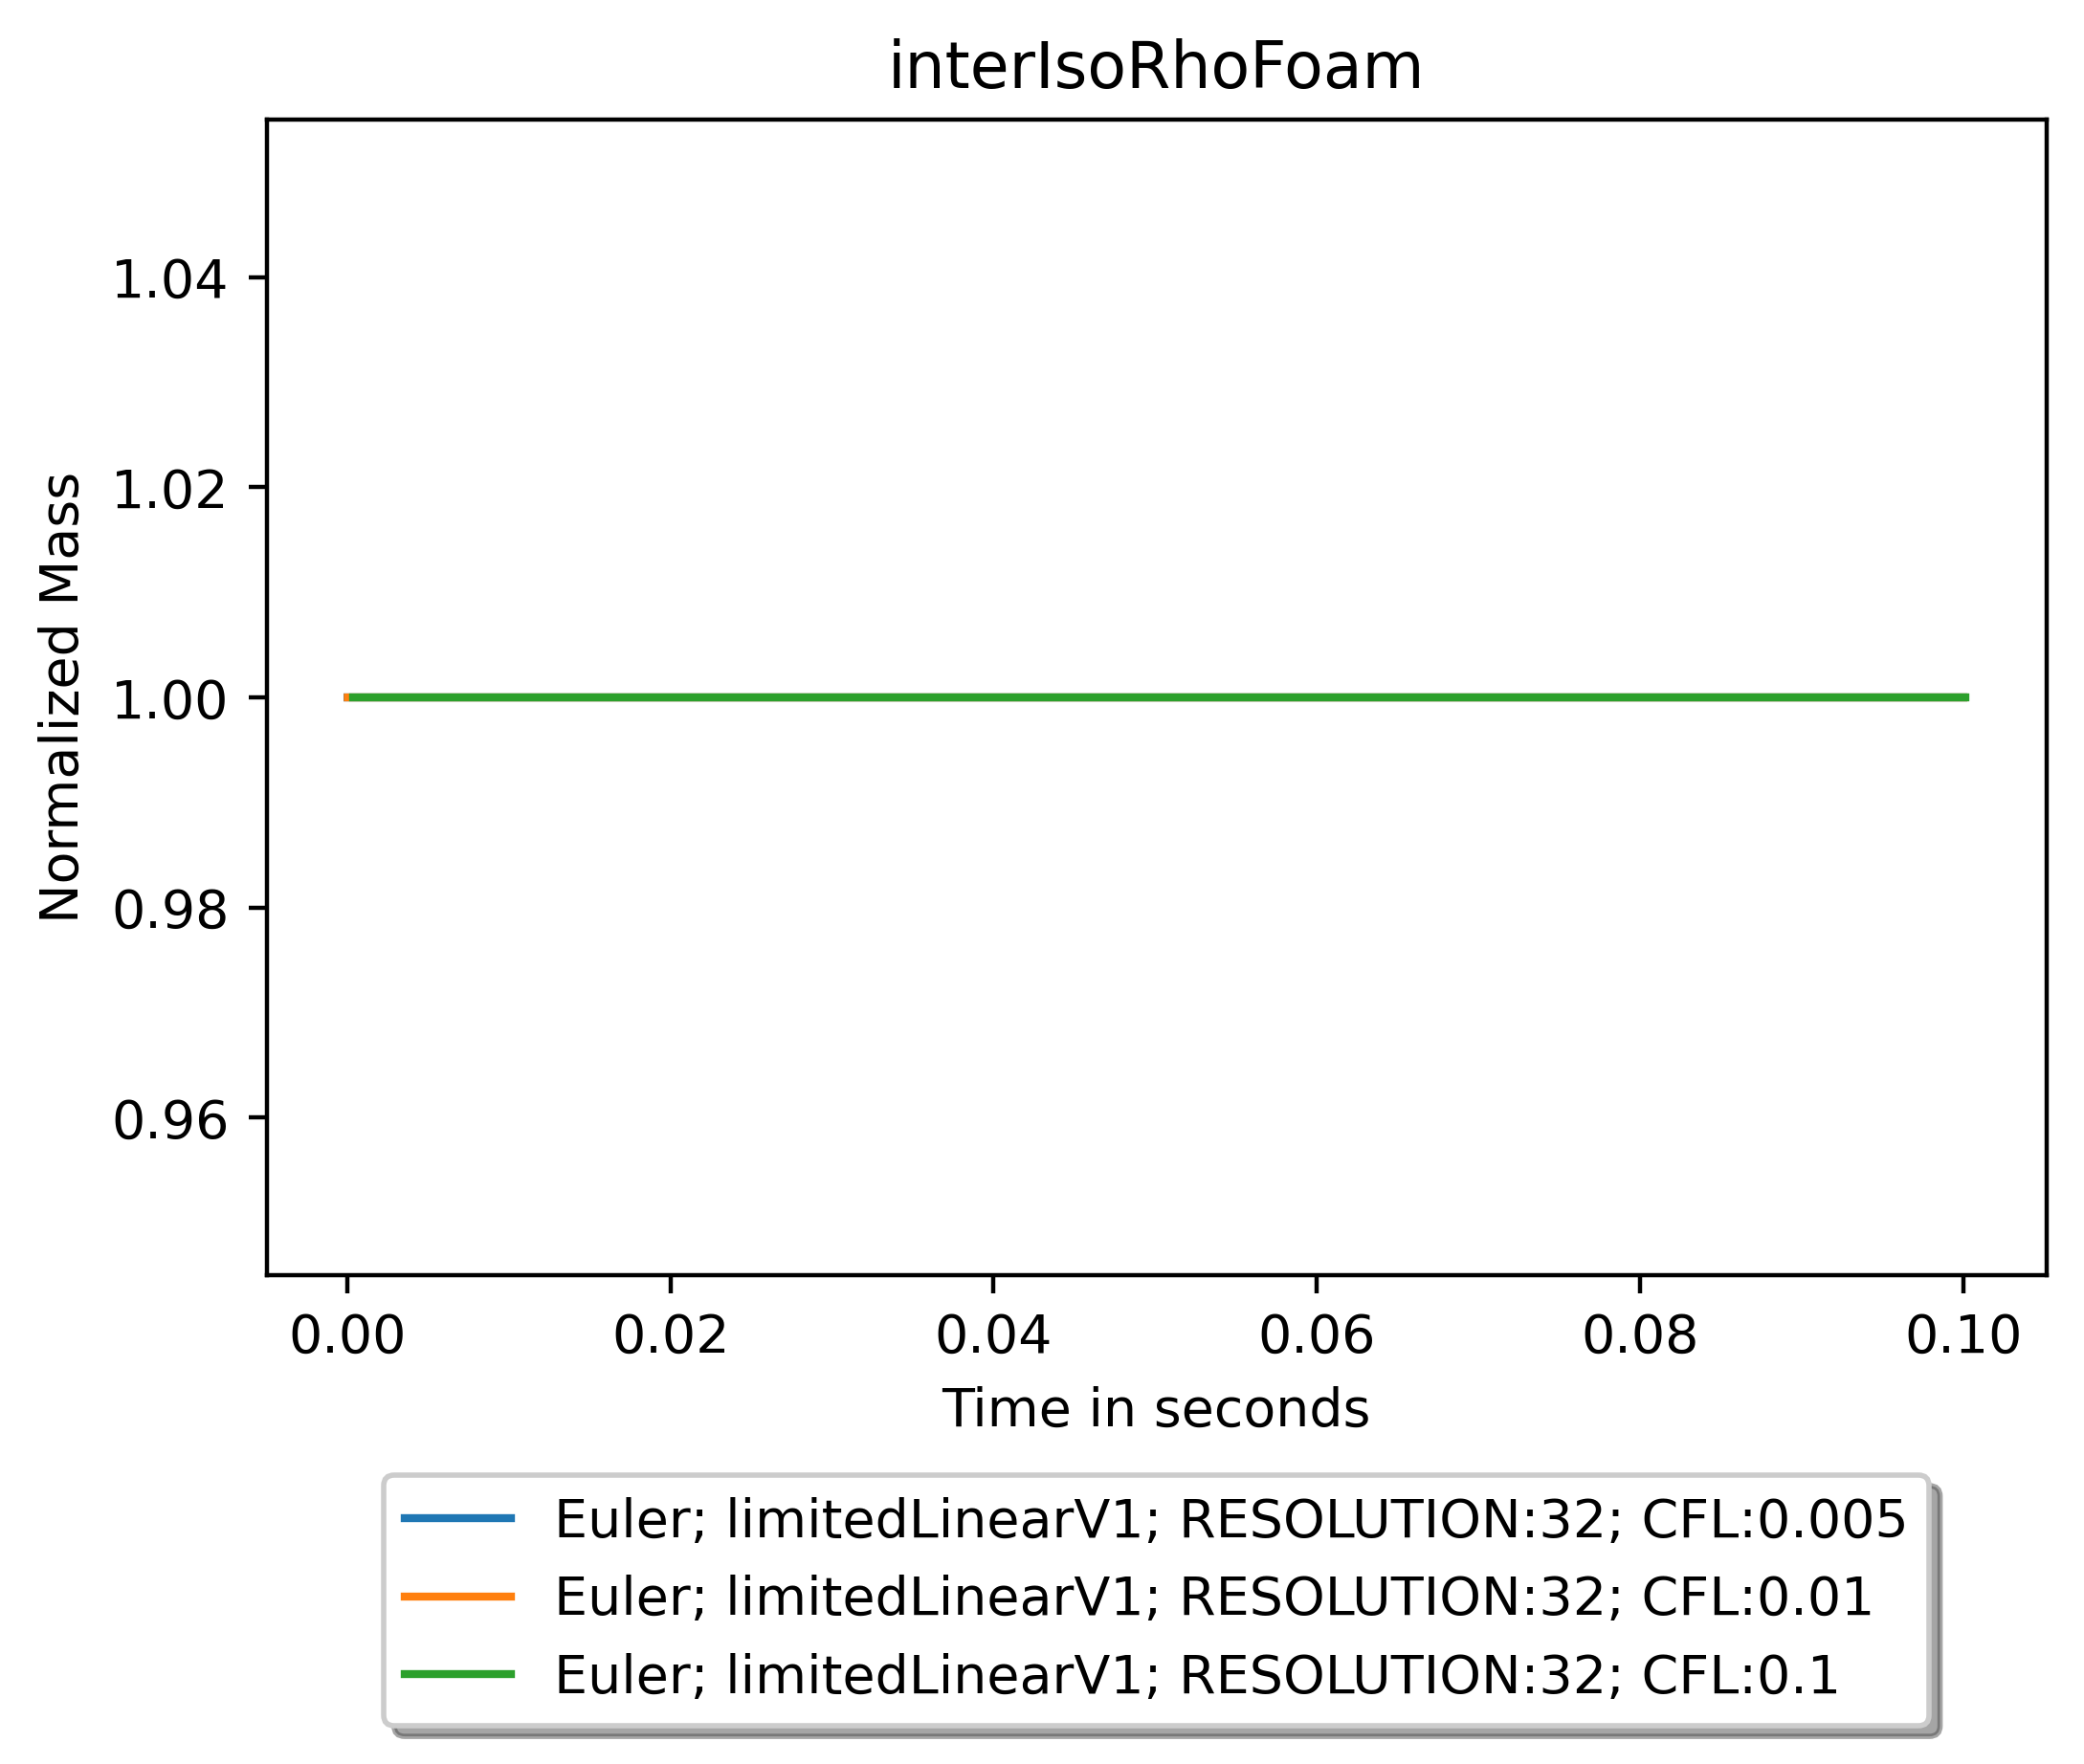

In [36]:
plot_NsumAlpha_dframe(dframe,'Euler','limitedLinearV1','interIsoRhoFoam')

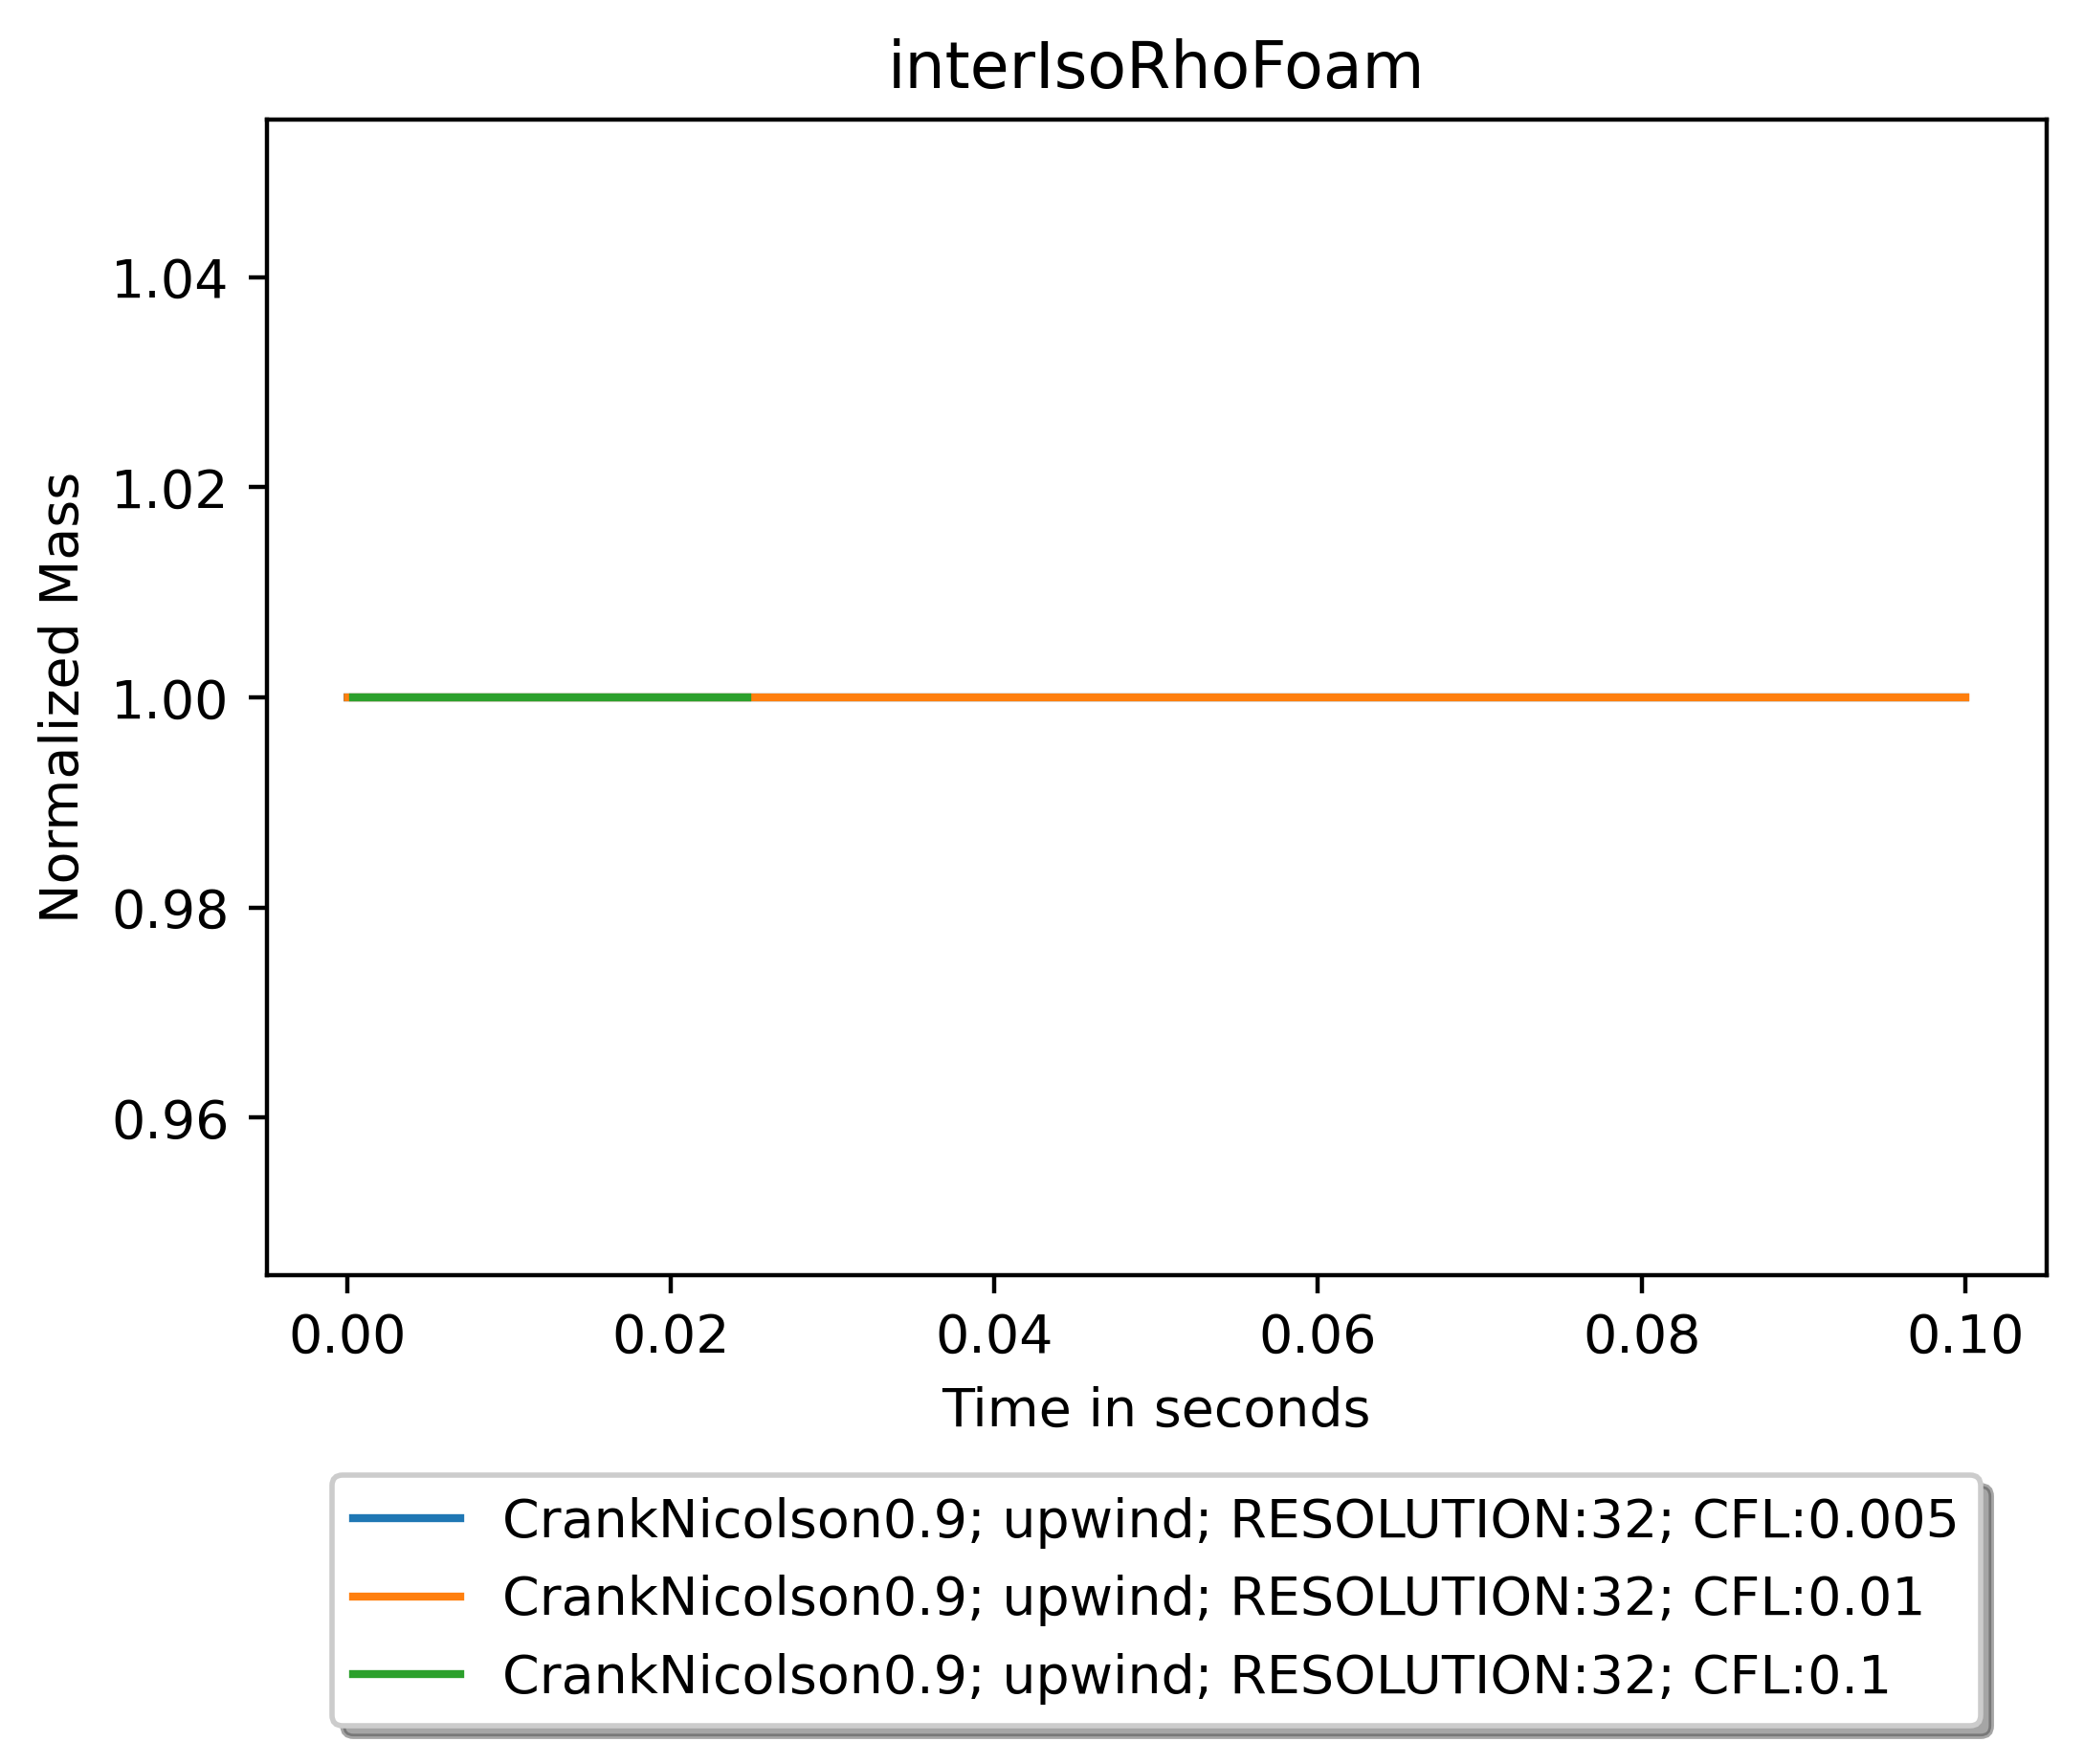

In [37]:
plot_NsumAlpha_dframe(dframe,'CrankNicolson0.9','upwind','interIsoRhoFoam')

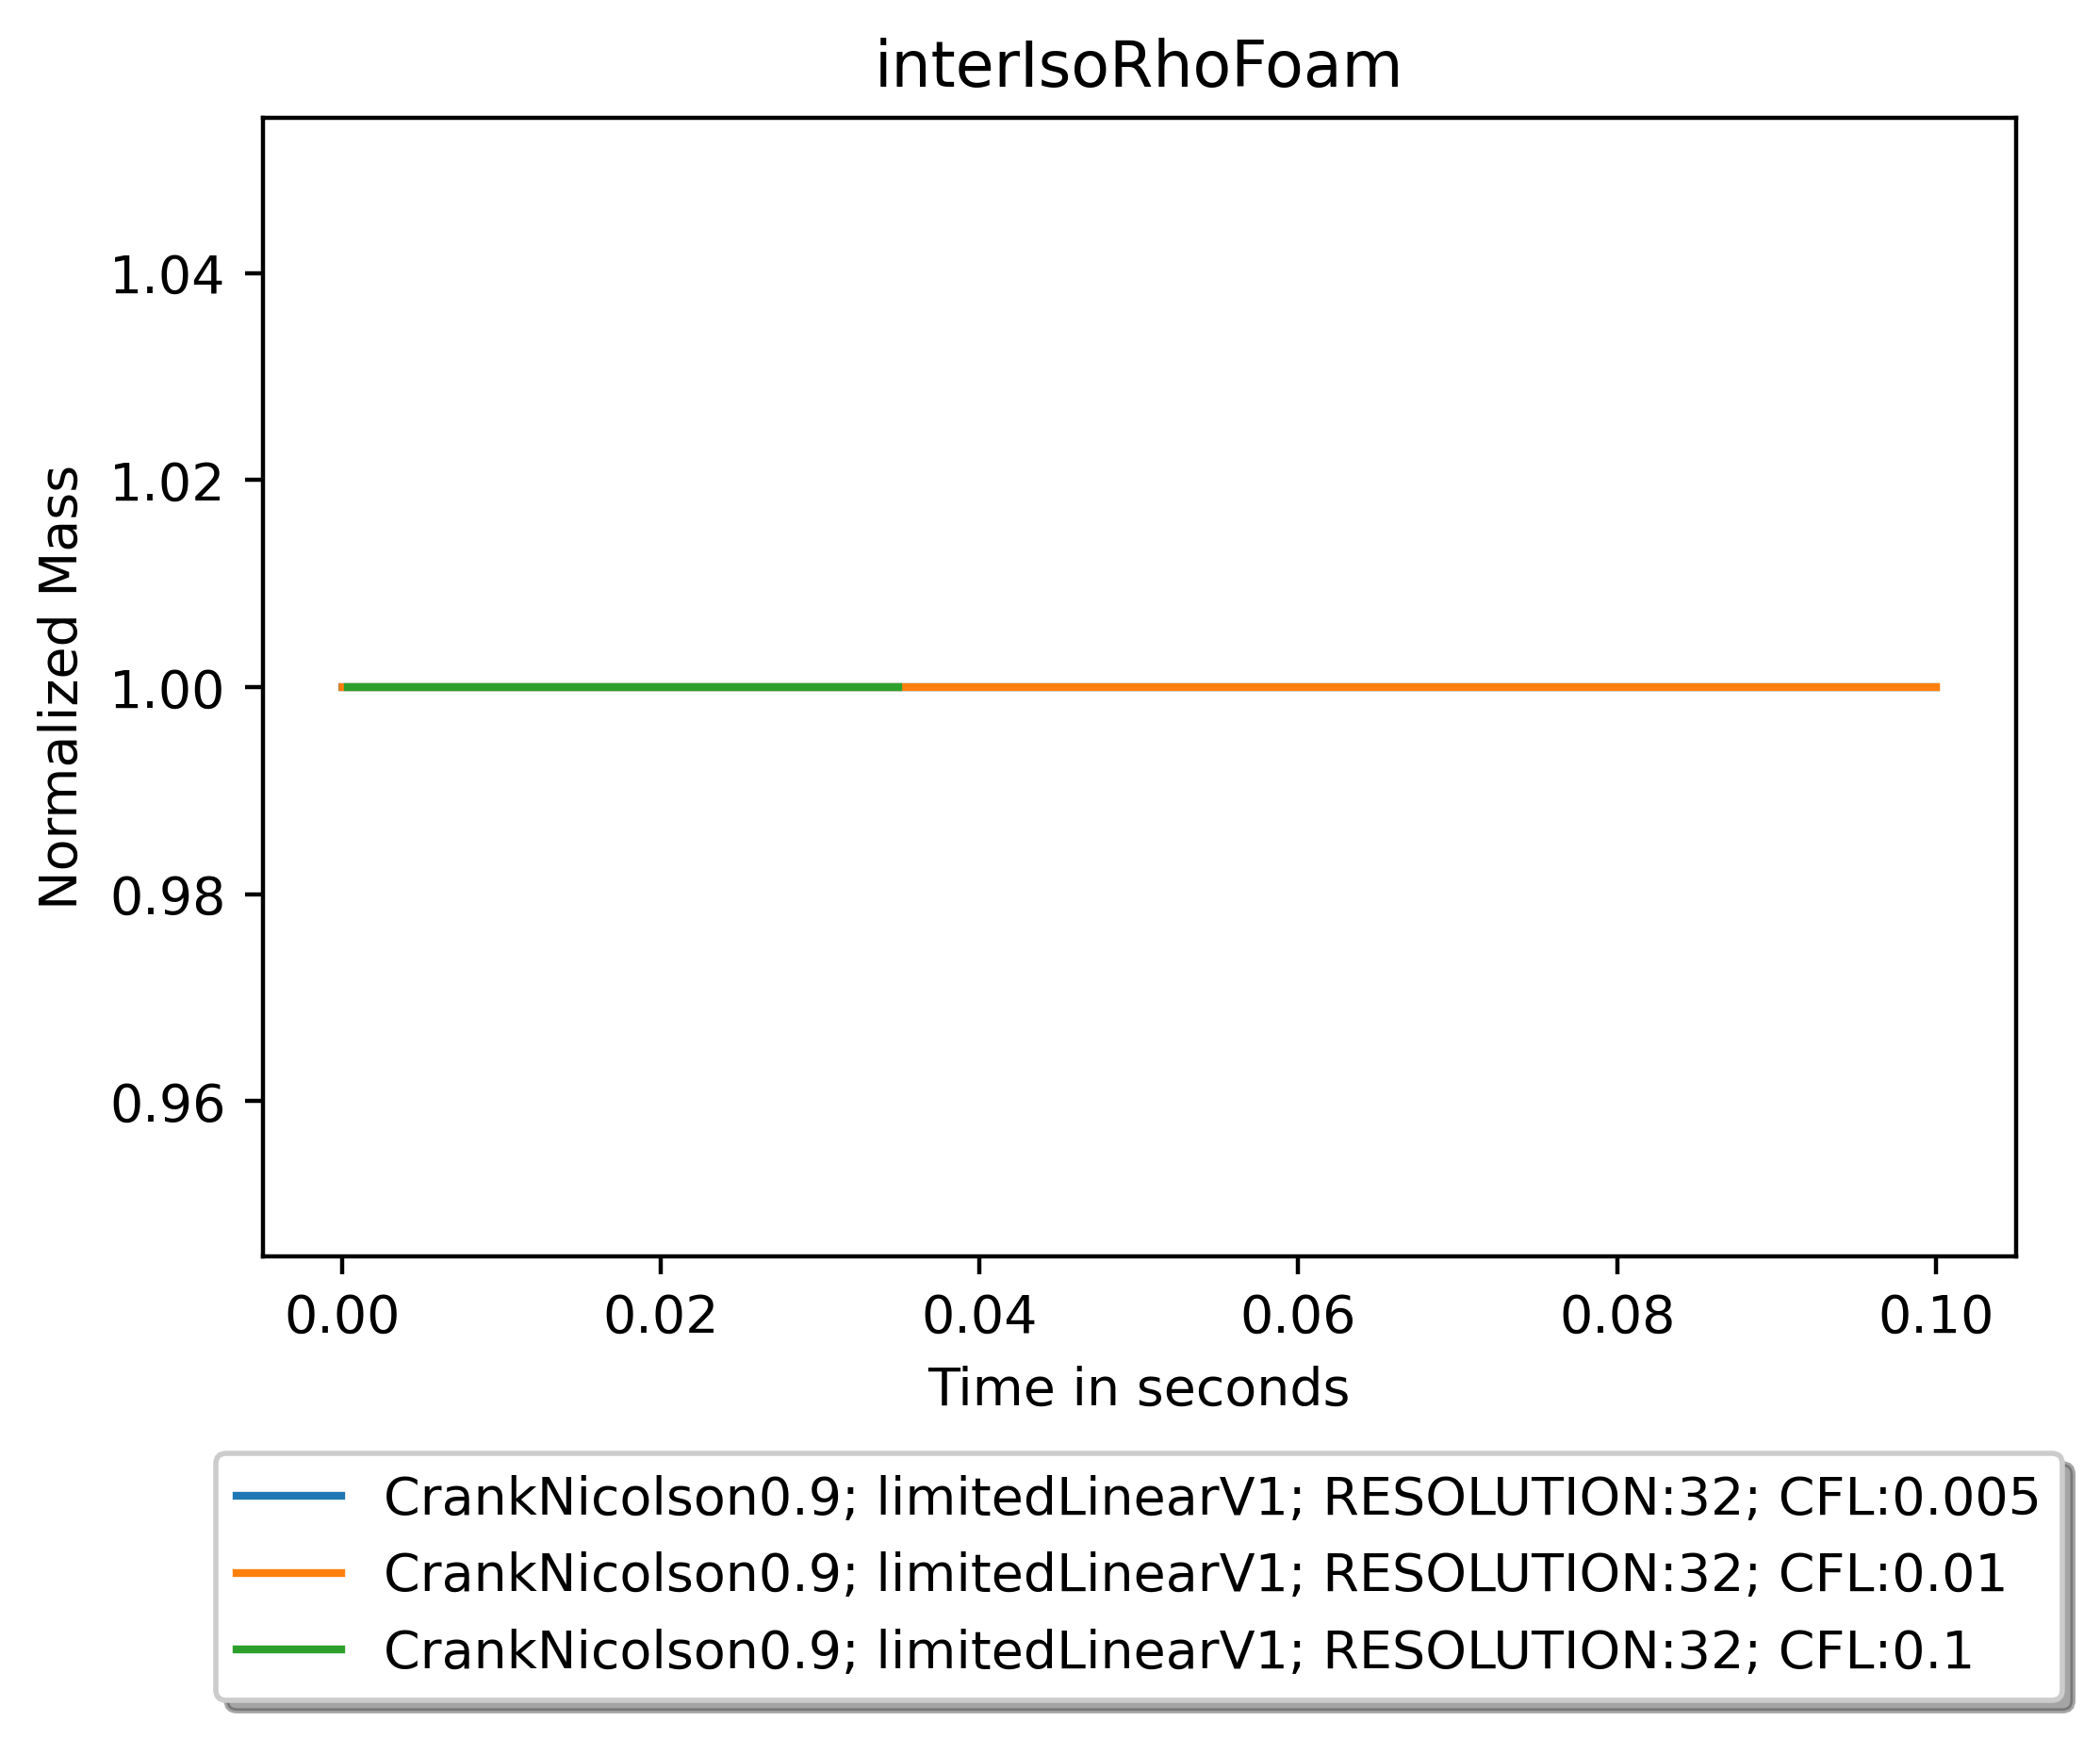

In [38]:
plot_NsumAlpha_dframe(dframe,'CrankNicolson0.9','limitedLinearV1','interIsoRhoFoam')

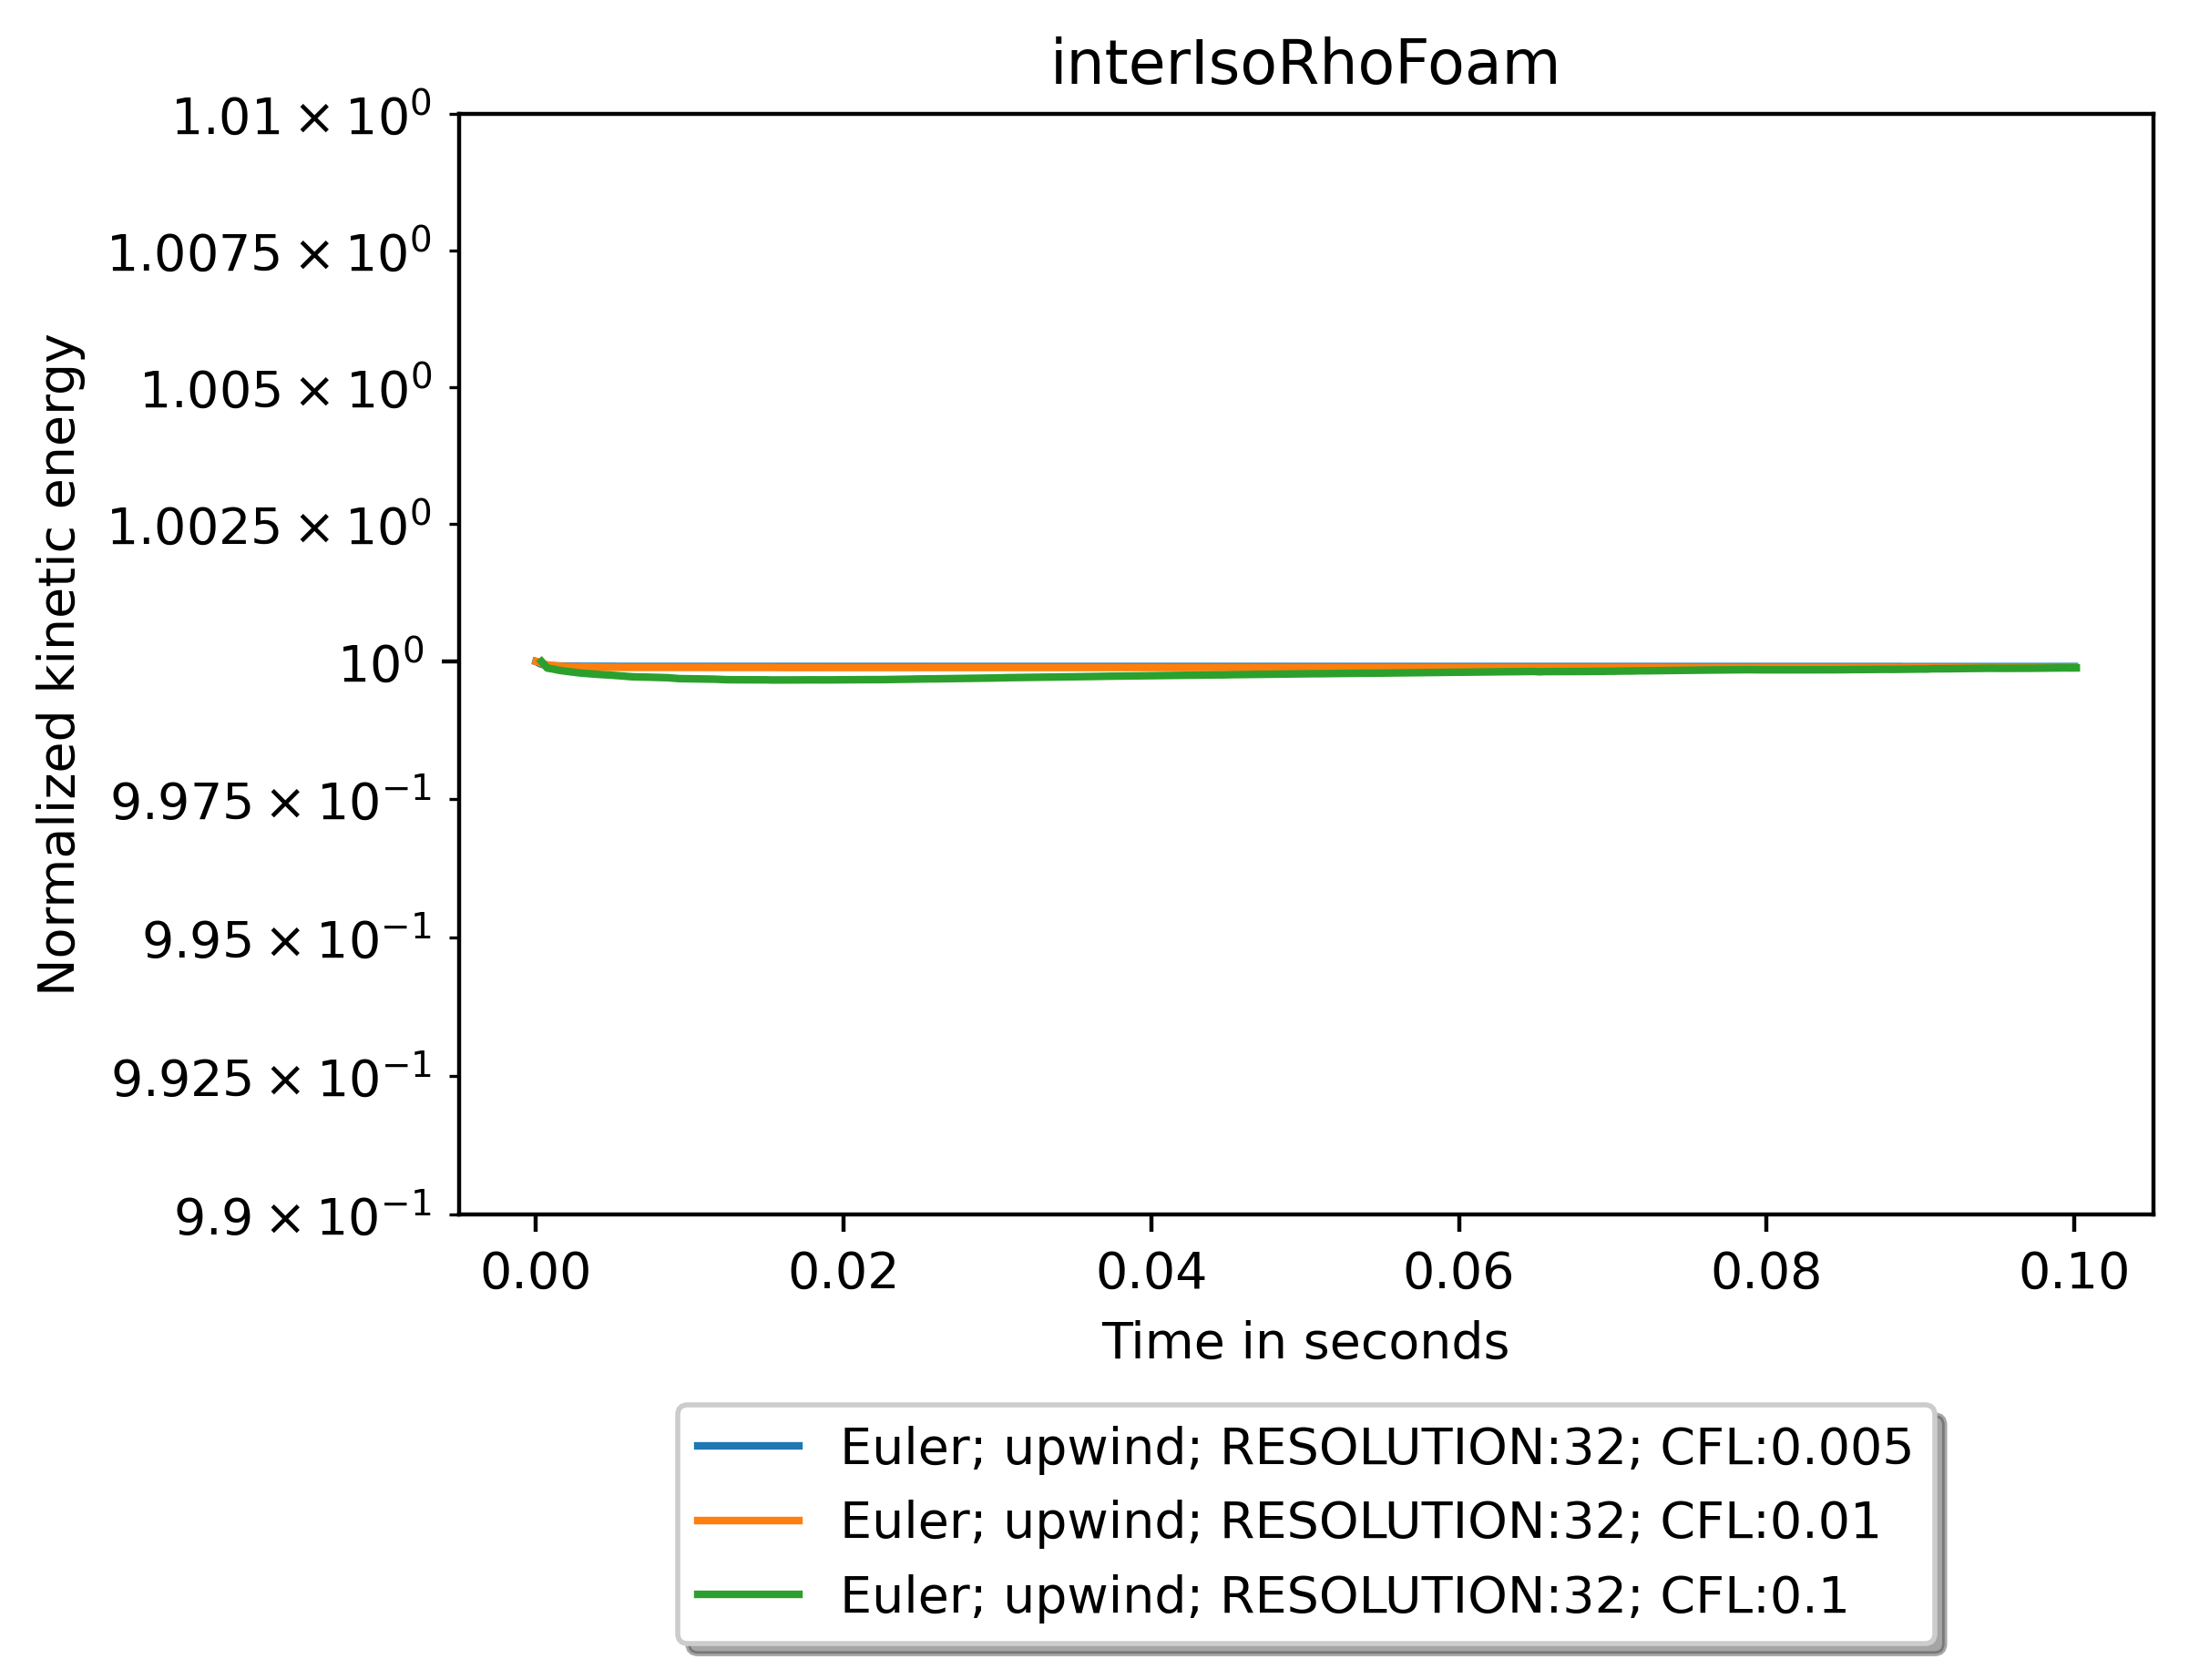

In [39]:
plot_NsumKinE_dframe(dframe,'Euler','upwind','interIsoRhoFoam')

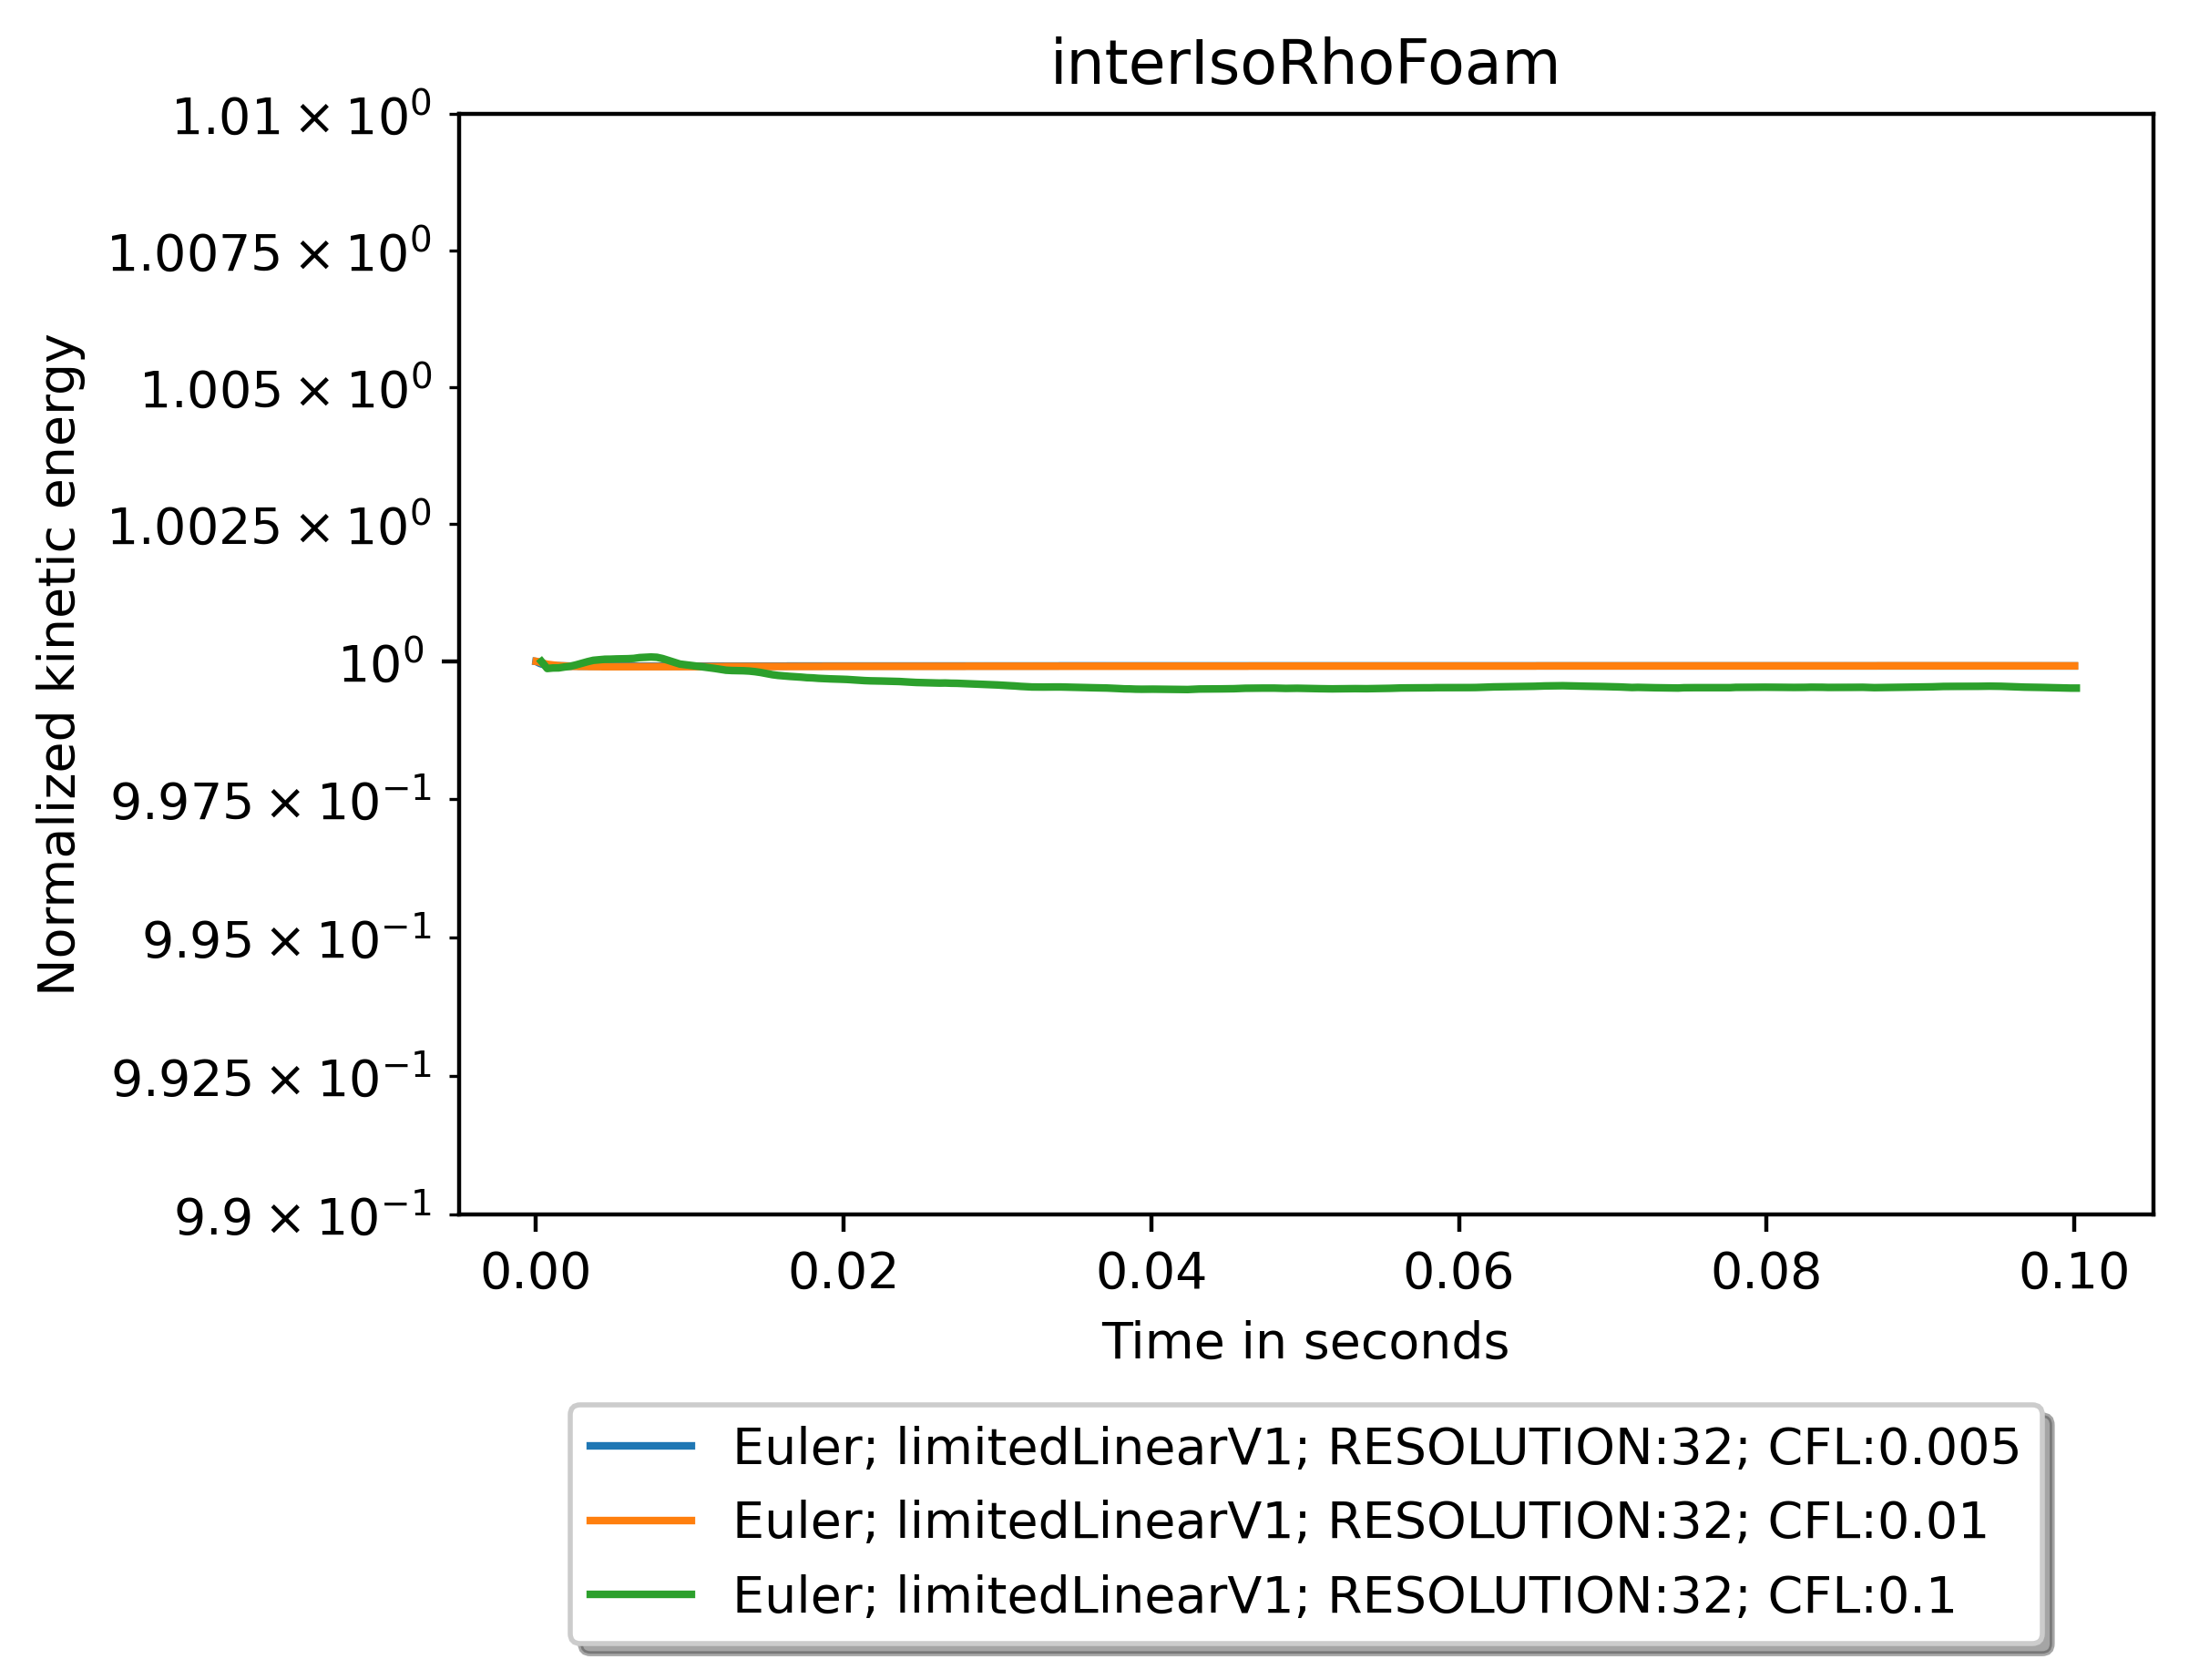

In [40]:
plot_NsumKinE_dframe(dframe,'Euler','limitedLinearV1','interIsoRhoFoam')

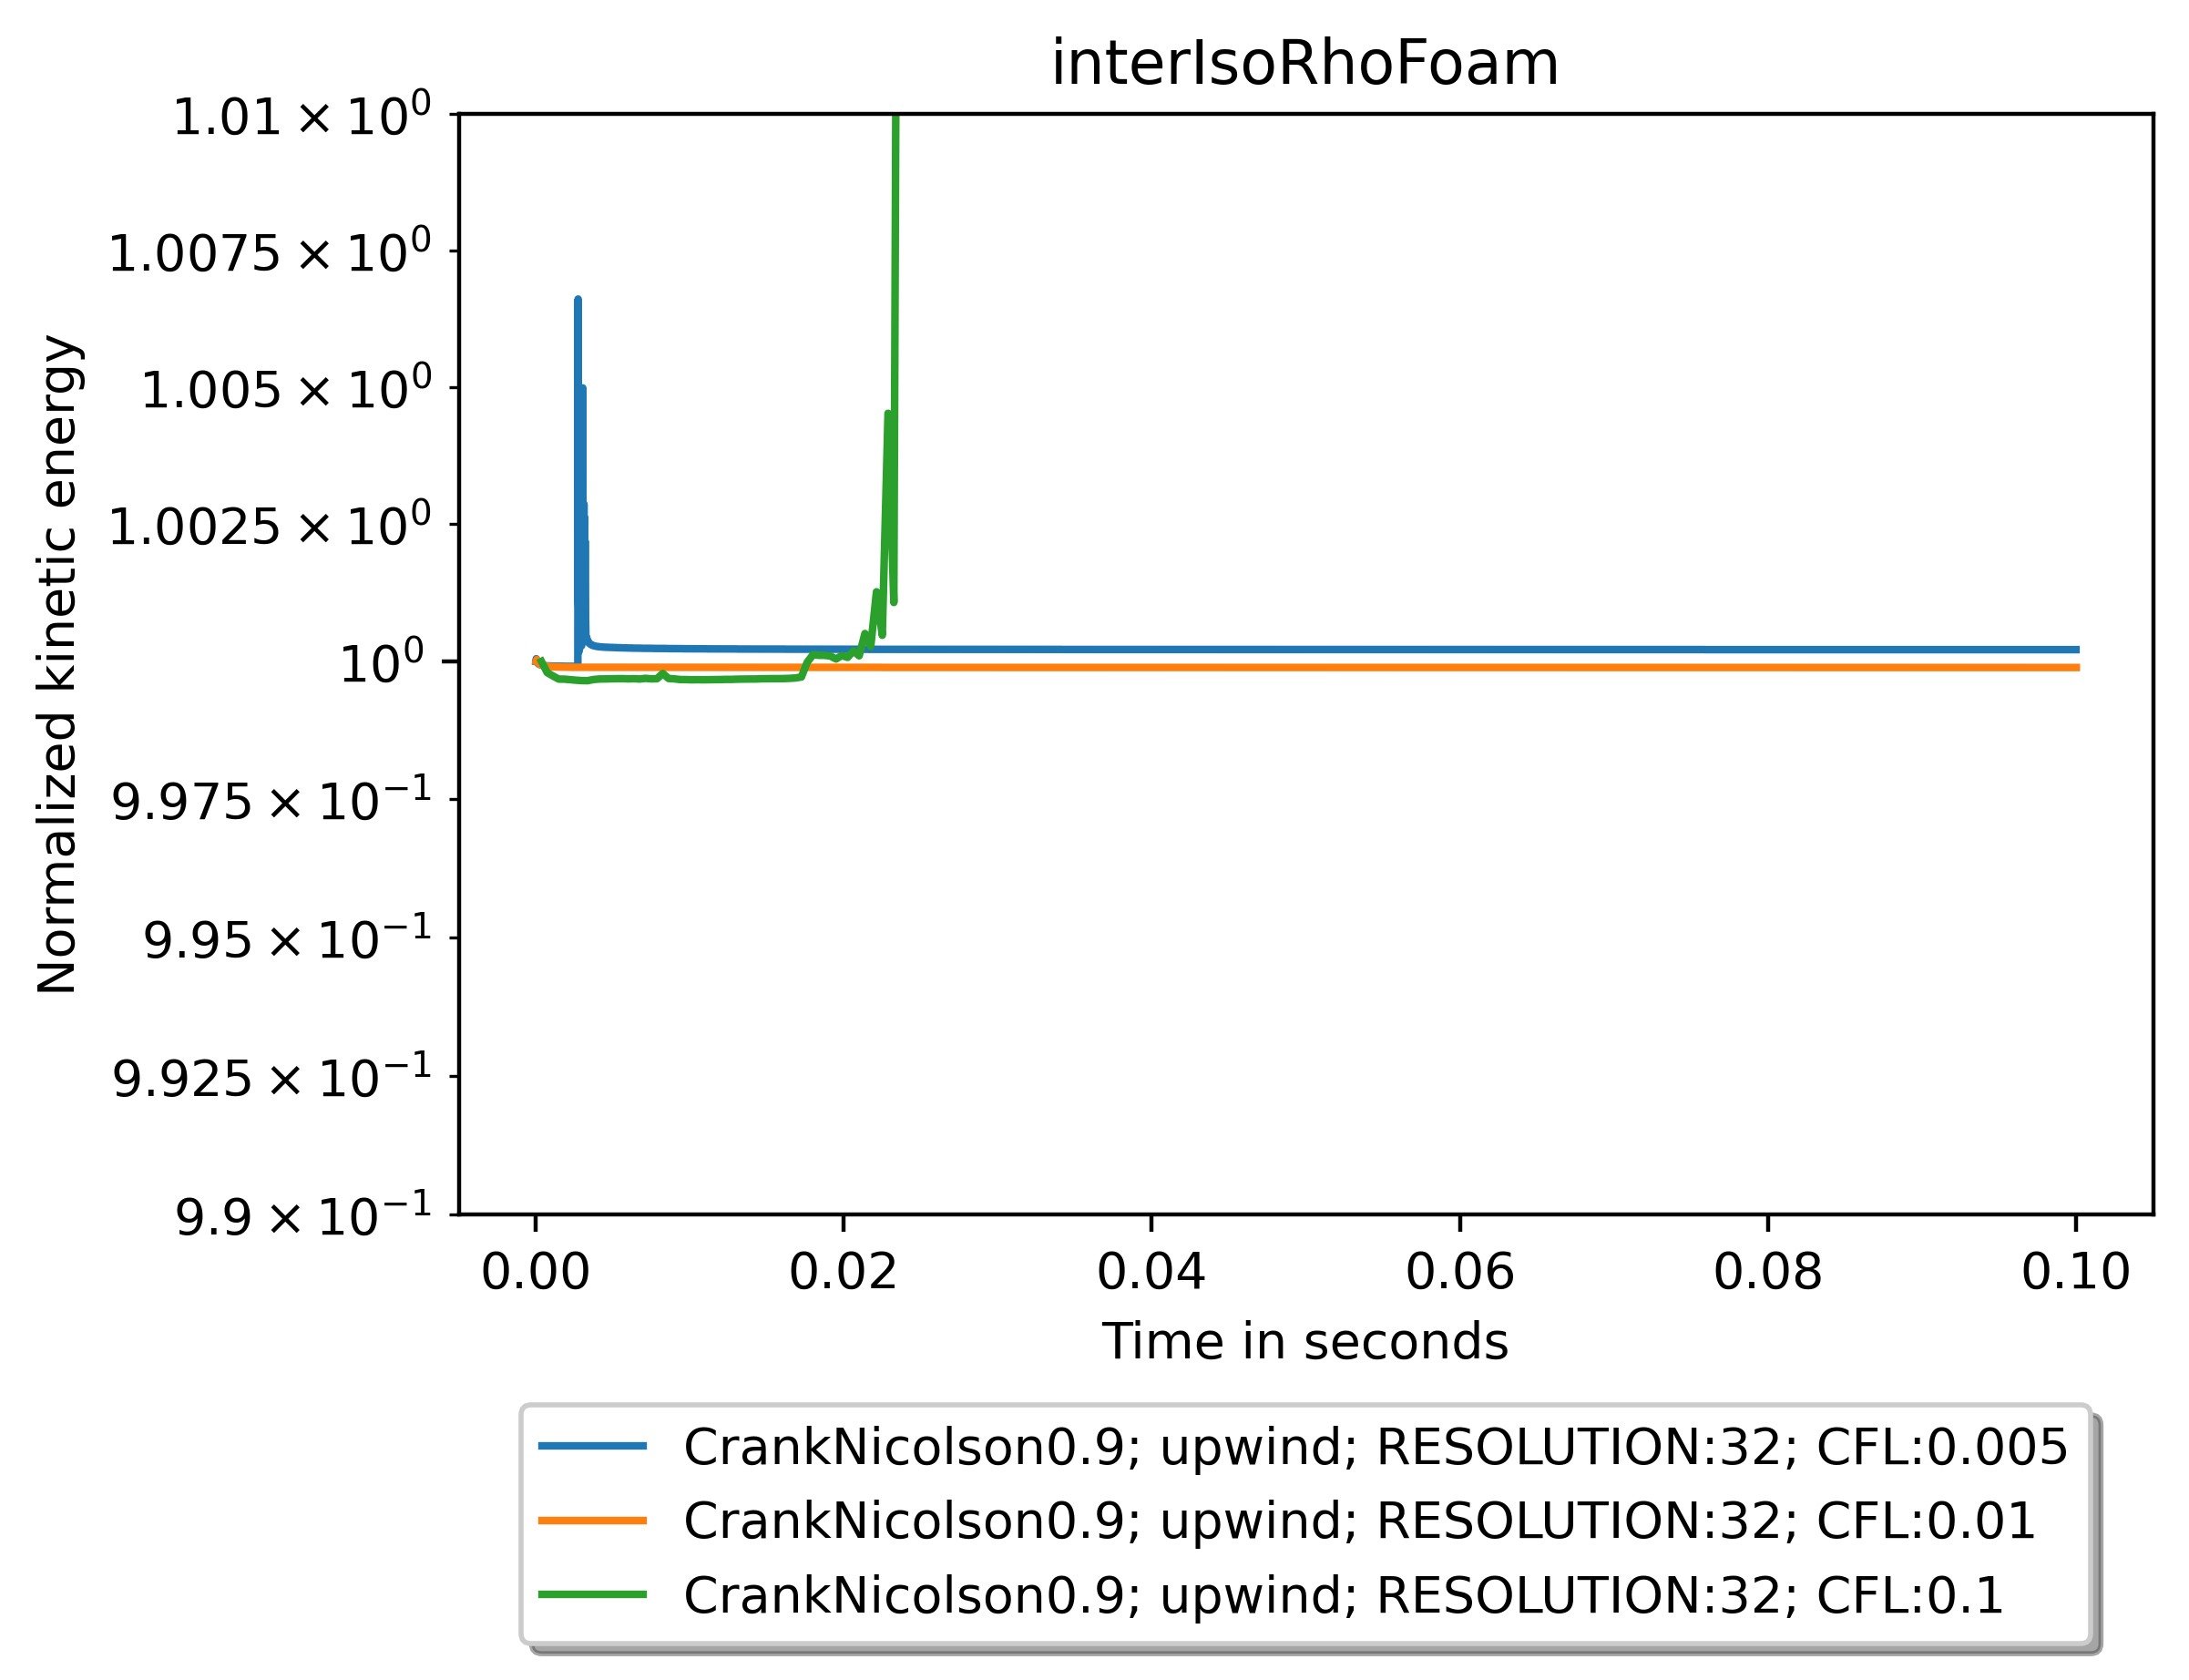

In [41]:
plot_NsumKinE_dframe(dframe,'CrankNicolson0.9','upwind','interIsoRhoFoam')

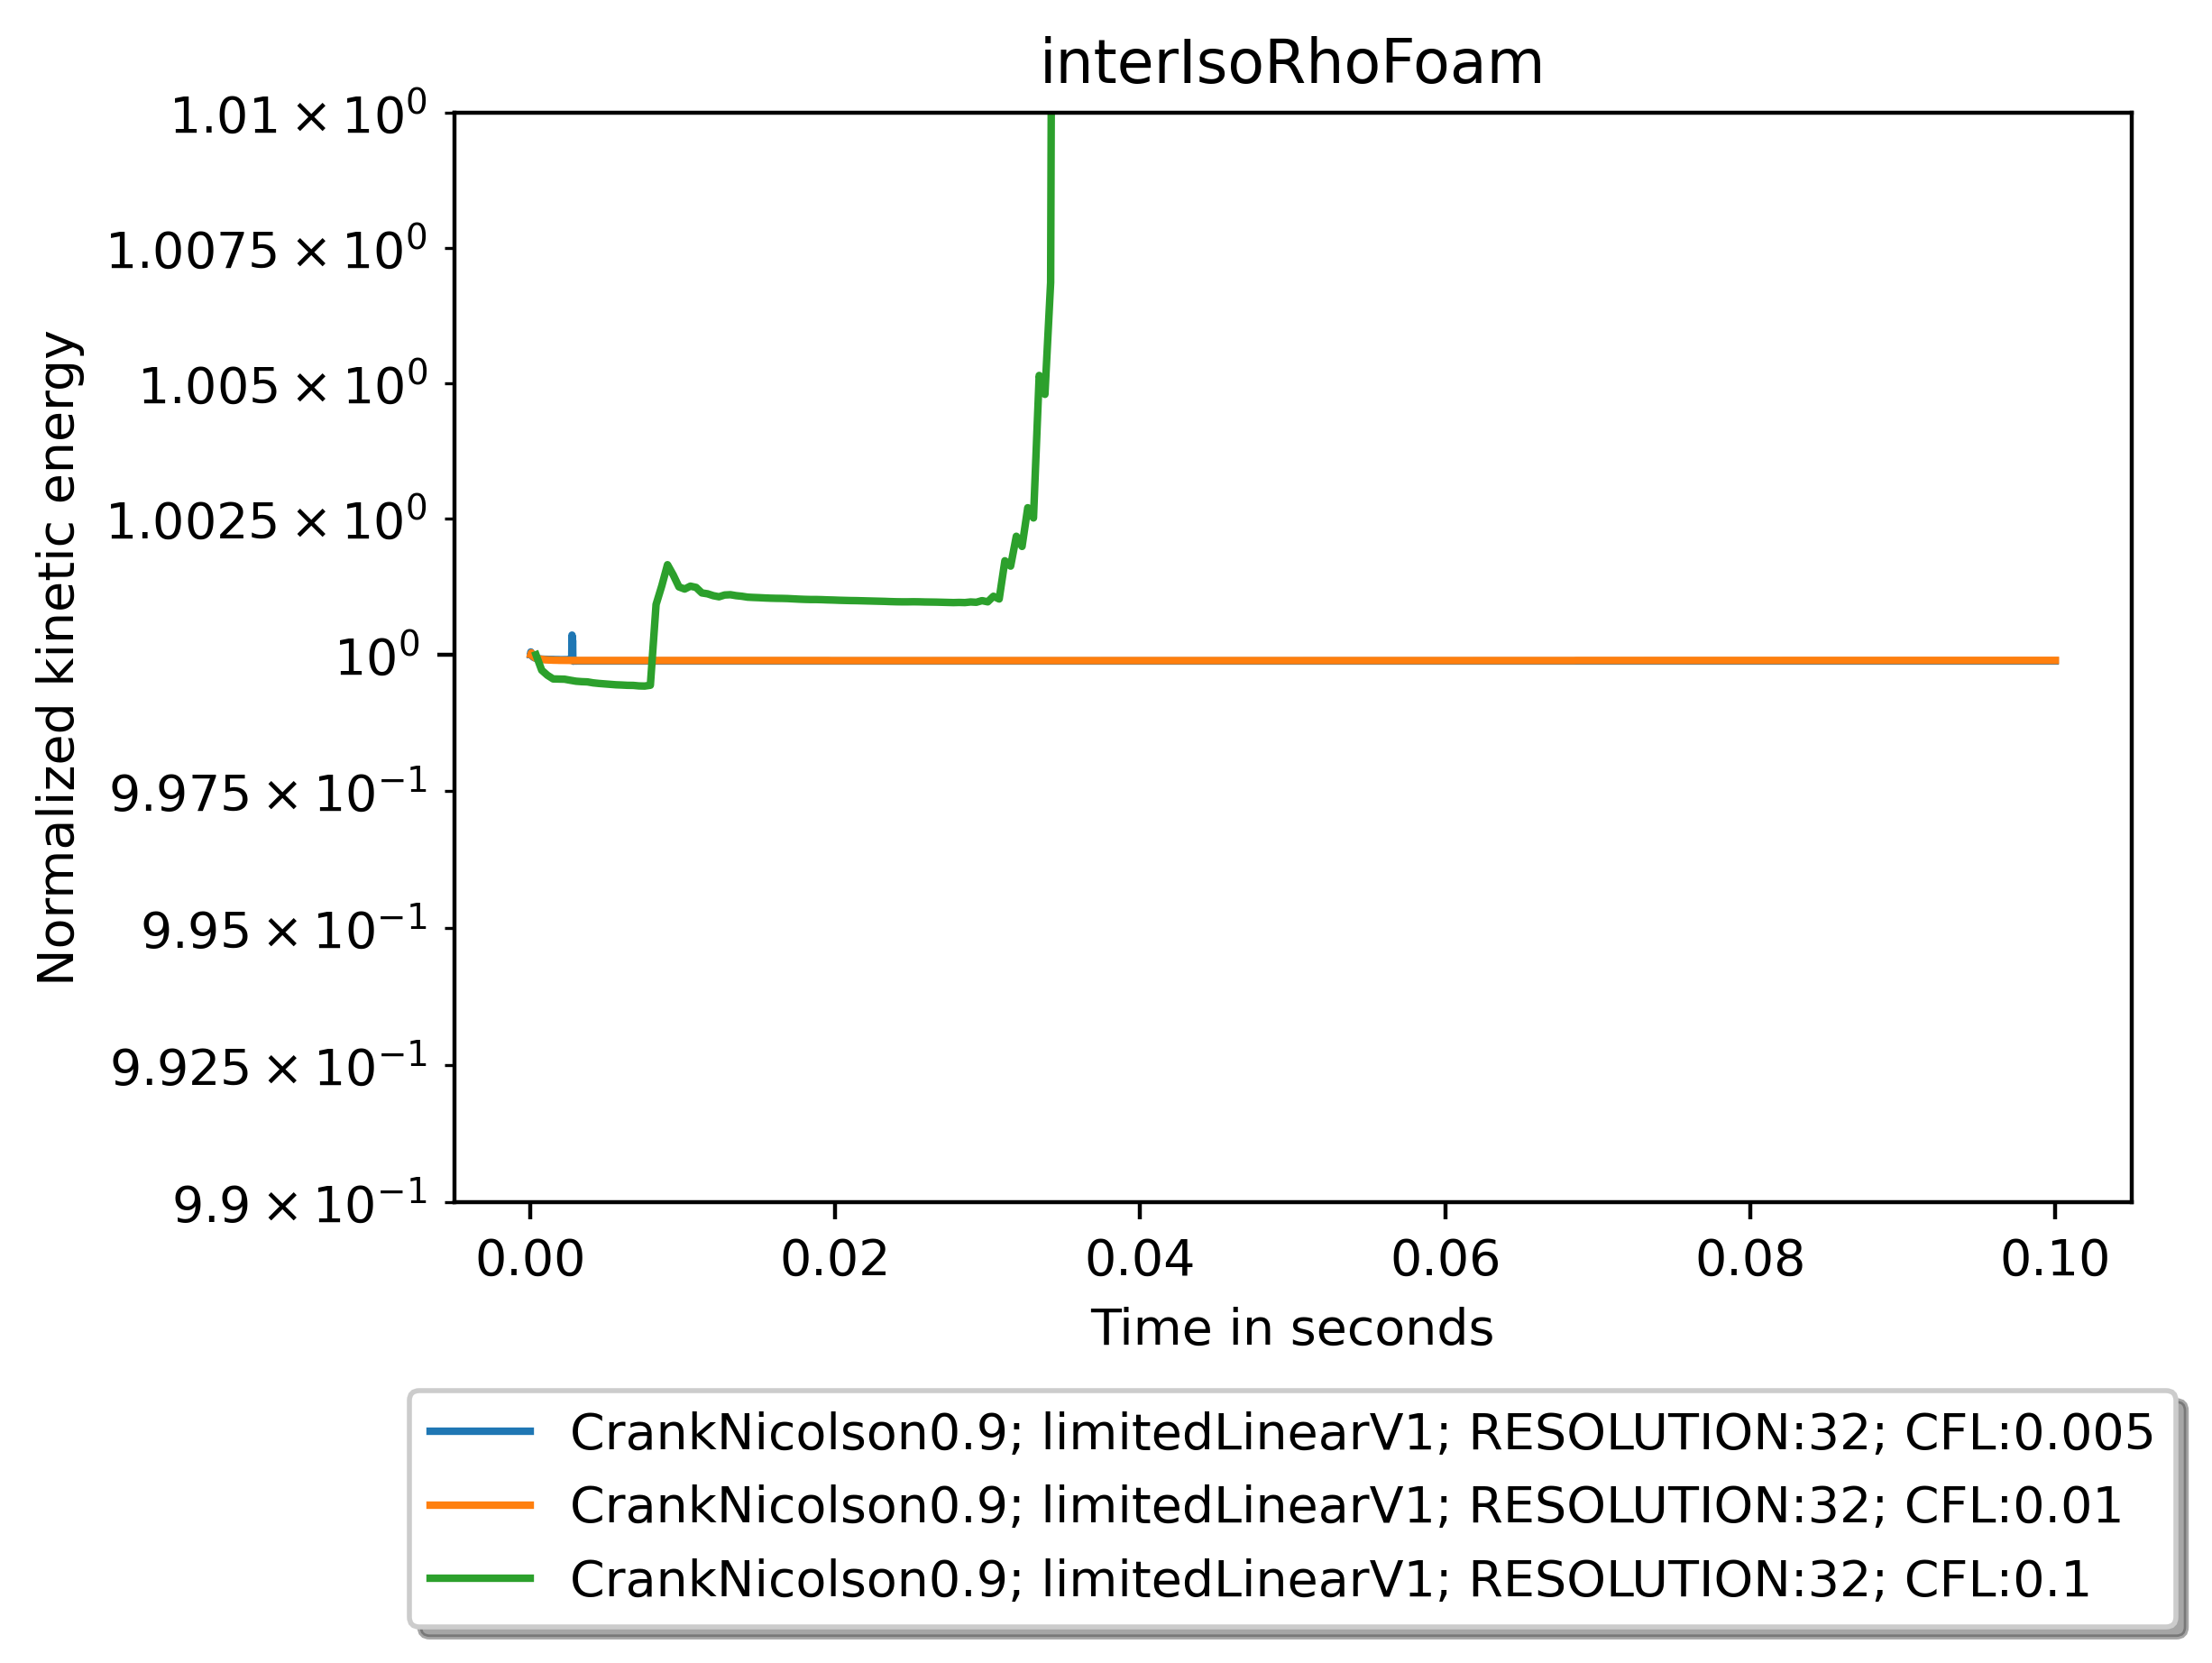

In [42]:
plot_NsumKinE_dframe(dframe,'CrankNicolson0.9','limitedLinearV1','interIsoRhoFoam')